<a href="https://colab.research.google.com/github/Slrosales/PC_AGUACATE_202310/blob/main/PC_AGUACATE_202310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [102]:
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr
from sympy import Poly
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, sympify
from sympy.abc import n
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import cairosvg
from PIL import Image
import io
from io import BytesIO
import urllib.request
import requests
import subprocess

import sys
sys.setrecursionlimit(15000)

!apt install ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.50~dfsg-5ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


# Entrega 1

## Método Simbólico

### Forma 1: Funcion general

Funciones de eliminar subcadenas de forma optmizada para que funcione para cualquier caso


In [ ]:
# n es la longitud
# tipo es tipo de cadena
# a es el 1er subcadena a eliminar
# b es la 2da subcadena a eliminar

def eliminar_cadena(n, tipo, a, b):
    # Funcion para crear la cadena:
    def metodo_simbolico(cadena):
      
        # Se verifica si las subcadenas ingresadas están en la cadena
        if a in cadena or b in cadena:
            return
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(cadena) == n:
            cadenas_permitidas.append(cadena)
            return
         
        # Agregamos los Átomos de acuerdo al tipo de cadena
        metodo_simbolico(cadena + "0")
        metodo_simbolico(cadena + "1")
        if tipo == 3 or tipo == 4:
          metodo_simbolico(cadena + "2")
          if tipo == 4:
            metodo_simbolico(cadena + "3")
       
    
       
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    metodo_simbolico("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos, len(cadenas_sin_repetidos)

In [ ]:
# n es la longitud
def par_unos(n):
    # Funcion para crear la cadena:
    def metodo_simbolic(cadena):

       
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(cadena) == n:
           count_ones = 0
           for i in range(len(cadena)):
              if cadena[i] == '1':
                 count_ones += 1
           if count_ones % 2 == 0:
              cadenas_permitidas.append(cadena)
           return
                
  
        # Agregamos z_0 y Z_1 y Z_2
        metodo_simbolic(cadena + "0")
        metodo_simbolic(cadena + "1")
        metodo_simbolic(cadena + "2")
       
    
       
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    metodo_simbolic("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos, len(cadenas_sin_repetidos)

In [ ]:
# n es la longitud
def estrictamente_creciente(n):
  if n == 0:
    return [""]
  elif n == 1:
    return ["0", "1", "2", "3"]
  elif n== 2:
    return ["01", "02", "03", "12", "13", "23"]
  elif n == 3:
    return ["012", "023", "123"]
  elif n == 4:
    return ["0123"]

Menu

In [ ]:
print("¿Qué desea hacer?")
print("1. Eliminar subcadenas (max 2)")
print("2. Imprimir una cadena cuaternaria estrictamente creciente")
print("3. Imprimir cadenas con un número par de unos")
res = int(input())
while (res < 1 or res >3):
  res = int(input("valor incorrecto, intente nuevamente: "))

print("\n")
if res == 1:
  n = int(input("Longitud de la cadena: "))
  print("\nTipo de Cadena:\n 2. Binaria\n 3. Ternaria\n 4. Cuaternaria")
  tipo = int(input())
  while (tipo < 2 or res >3):
    tipo = int(input("valor incorrecto, intente nuevamente: "))
  
  cadena = input("\nIngrese maximo 2 subcadenas que desee eliminar (ej: 000, 01): ")
  coma = cadena.find(',')
  
  if coma == -1:
    a = cadena
    b = a
  else:
    a,b = cadena.split(", ")
  print("\n")
  p,x = eliminar_cadena(n,tipo, a, b)
  p = '\n'.join(str(elemento) for elemento in p)
  print("Cadenas generadas\n", p, "\nTotal: ", x)

elif res == 2:
  n = int(input("Longitud de la cadena entre 0 y 4: "))
  while (n < 0 or n > 4):
    n = int(input("valor incorrecto, intente nuevamente: "))

  p =  estrictamente_creciente(n)
  p = '\n'.join(str(elemento) for elemento in p)
  print("Cadenas generadas\n", p, "\nTotal: ", len(p))
elif res == 3:
  n = int(input("Longitud de la cadena: "))
  p,x = par_unos(n)
  p = '\n'.join(str(elemento) for elemento in p)
  print("Cadenas generadas\n", p, "\nTotal: ", x)

¿Qué desea hacer?
1. Eliminar subcadenas (max 2)
2. Imprimir una cadena cuaternaria estrictamente creciente
3. Imprimir cadenas con un número par de unos
1


Longitud de la cadena: 2

Tipo de Cadena:
 2. Binaria
 3. Ternaria
 4. Cuaternaria
2

Ingrese maximo 2 subcadenas que desee eliminar (ej: 000, 01): 00, 01


Cadenas generadas
 11
10 
Total:  2


### Forma 2: Funciónes punto por punto
La base para realizar la funcion cadenas binarias sin 11 ni 10 se hizo con ayuda de chat gpt planteandolo como función de una función y como cadena string, esto ayudo a poder genralizar los casos de eliminación de subcadenas

Cadenas Binarias que no contengan 000 ni 010

In [ ]:
def sin_000_010(n):
    # Funcion para crear la cadena:
    def crear_string(B):
      
         
        if "010" in B or "000" in B:
            return
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(B) == n:
            cadenas_permitidas.append(B)
            return
     
      
        # Agregamos z_0 y Z_1
        crear_string(B + "0")
        crear_string(B + "1")
   
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    crear_string("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos

Cadenas binarias de longitud n que no contengan 11 y 10 

In [ ]:
def sin_11_10(n):
    # Funcion para crear la cadena:
    def crear_string(B):
      
         # Condicion si hay 10 o 11 se descarta.
        if "10" in B or "11" in B or "110" in B:
            return
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(B) == n:
            cadenas_permitidas.append(B)
            return
     
      
        # Agregamos z_0 y Z_1
        crear_string(B + "0")
        crear_string(B + "1")
       
    
       
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    crear_string("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos

In [ ]:
p=  sin_11_10(6)
p

['000000', '000001']

Cadenas ternarias de longitud n que no contengan la subcadena "00"

In [ ]:
def sin_00(n):
    # Funcion para crear la cadena:
    def crear_string(B):
        if "00" in B:
          return
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(B) == n:
            cadenas_permitidas.append(B)
            return

      
        # Agregamos z_0 y Z_1
        crear_string(B + "0")
        crear_string(B + "1")
        crear_string(B + "2")
    
       
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    crear_string("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos

In [ ]:
l= sin_00(4)
l

Cadenas Ternarias que no contengan 000

In [ ]:
def sin_000(n):
    # Funcion para crear la cadena:
    def crear_string(B):
      
         # Condicion si hay 000 se descarta.
        if "000" in B:
            return
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(B) == n:
            cadenas_permitidas.append(B)
            return

      
        # Agregamos z_0 y Z_1
        crear_string(B + "0")
        crear_string(B + "1")
        crear_string(B + "2")
       
    
       
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    crear_string("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos

In [ ]:
x=sin_000(3)
x

#### Cadenas Ternarias que  tengan pares de unos

In [ ]:
def par(n):
    # Funcion para crear la cadena:
    def crear_string(B):

       
         # si la cadena tiene la misma longitud que el input n, se agrega
        if len(B) == n:
           count_ones = 0
           for i in range(len(B)):
              if B[i] == '1':
                 count_ones += 1
           if count_ones % 2 == 0:
              cadenas_permitidas.append(B)
           return
                
  
        # Agregamos z_0 y Z_1 y Z_2
        crear_string(B + "0")
        crear_string(B + "1")
        crear_string(B + "2")
        
    # Lista para almacenar las cadenas binarias válidas
    cadenas_permitidas = []
  
    crear_string("")
    # Para que no salga cadenas repetidas 
    cadenas_sin_repetidos = list(set(cadenas_permitidas))
    
    return cadenas_sin_repetidos

In [ ]:
x = par(3)
len(x) 

14

Cadenas estrictamente crecientes:

Menu



In [ ]:

n=int(input('Dame la longitud que quiere ver las cadenas: ')) 
print("¿Que punto quiere ver?")
print("1. Cadenas binarias de longitud n, que no contengan a las subcadenas 11 y 10.")
print("2. Cadenas ternarias, de longitud n, que no contengan a la subcadena 00.")
print("3. Cadenas cuaternarias, de longitud n, que tengan sus caracteres en orden estrictamente creciente. ")
print("4. Cadenas ternarias, de longitud n, que contengan un n ́umero par de unos")
print("5. Cadenas binarias, de longitud n, que no contengan a la subcadena 000 ni a la subcadena 010")
print("6. Cadenas ternarias, de longitud n, que no contengan a la subcadena 000")
res = int(input())
while (res < 1 or res >6):
  res = int(input("valor incorrecto, intente nuevamente: "))
if res==1:
 h=  sin_11_10(n)
 print('Esta son las posibles cadenas con esta condición')
 print(h)
if res==2:
 h=  sin_00(n)
 print('Esta son las posibles cadenas con esta condición')
 print(h)
if res==3:
  while (n < 0 or n > 4):
    n = int(input("valor incorrecto, intente nuevamente: "))
  h = estrictamente_crecient(n)
  print("Esta son las posibles cadenas con esta condición")
  print(h)
if res==4:
 h=  par(n)
 print('Esta son las posibles cadenas con esta condición')
 print(h)
if res==5:
 h=  sin_000_010(n)
 print('Esta son las posibles cadenas con esta condición')
 print(h)
if res==6:
 h =  sin_000(n)
 print('Esta son las posibles cadenas con esta condición')
 print(h)

print("La cantidad de cadenas generadas es: ", len(h))

Dame la longitud que quiere ver las cadenas: 4
¿Que punto quiere ver?
1. Cadenas binarias de longitud n, que no contengan a las subcadenas 11 y 10.
2. Cadenas ternarias, de longitud n, que no contengan a la subcadena 00.
3. Cadenas cuaternarias, de longitud n, que tengan sus caracteres en orden estrictamente creciente. 
4. Cadenas ternarias, de longitud n, que contengan un n ́umero par de unos
5. Cadenas binarias, de longitud n, que no contengan a la subcadena 000 ni a la subcadena 010
6. Cadenas ternarias, de longitud n, que no contengan a la subcadena 000
3
Esta son las posibles cadenas con esta condición
['0123']
La cantidad de cadenas generadas es:  1


In [ ]:
# n es la longitud
def estrictamente_crecient(n):
  if n == 0:
    x = [""]
    return x
  elif n == 1:
    x  ["0", "1", "2", "3"]
    return x
  elif n== 2:
    x = ["01", "02", "03", "12", "13", "23"]
    return x
  elif n == 3:
    x = ["012", "023", "123"]
    return x
  elif n == 4:
    x = ["0123"]
    return x

## Tablero de Ajedrez

In [ ]:
T = np.zeros((8,8))
print(T)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


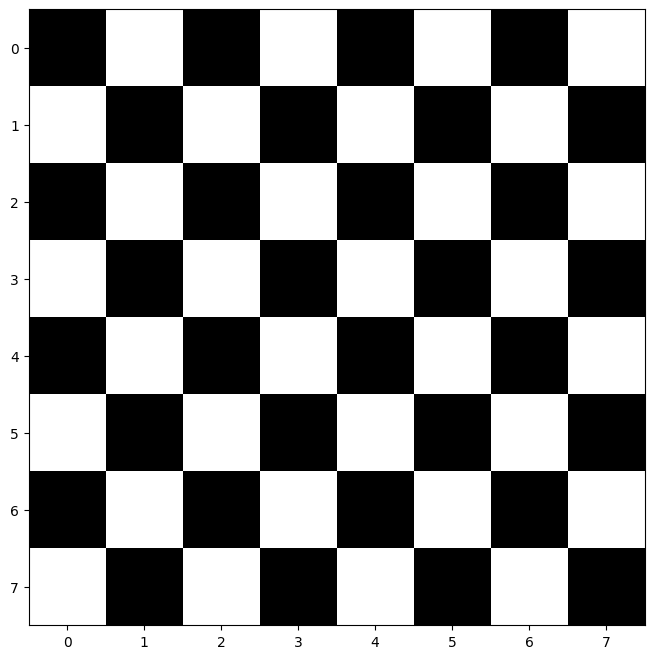

In [ ]:
# [vi: cf: step]
#T[filas pares, columnas pares]
T[::2, 1::2]=1

#T[filas impares, columnas pares]
T[1::2, ::2]=1

plt.figure(figsize = (16,8))
plt.imshow(T, cmap='gray')

## Triangulo de pascal 

In [ ]:
n=int(input("Dime el grado:"))
n=n+1
TP = np.zeros((n+1,2*n+1))
TP[0, (2*n+1)//2]=1

for i in range(1,n):
  for j in range(n-i, n+i+1,2):
    TP[i,j] = TP[i-1, j-1]+TP[i-1,j+1]
print('\n'.join([
    ''.join(['{:4}'.format(int(item) if item != 0 else '') for item in row])
    for row in TP
]))

Dime el grado:20
                                                                                       1                                                                                    
                                                                                   1       1                                                                                
                                                                               1       2       1                                                                            
                                                                           1       3       3       1                                                                        
                                                                       1       4       6       4       1                                                                    
                                                                   1       5      10      10       5       1          

## Fractal Polinomico

Cantidad de fractales15


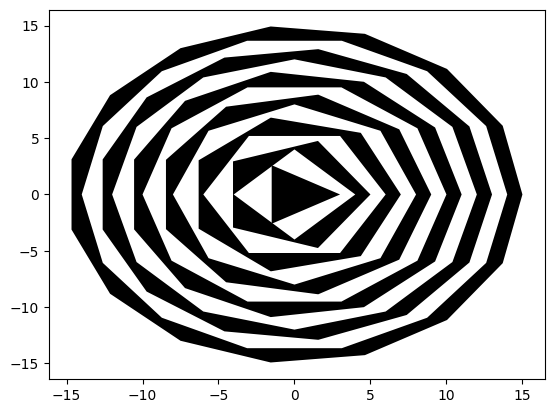

In [ ]:
# n = número de segmentos
# linspace(vi, área a dividir, vf)
n = int(input("Cantidad de fractales"))

def polinomio(n):
  x = n*np.cos(np.linspace(0, 2*np.pi, n+1))
  y = n*np.sin(np.linspace(0, 2*np.pi, n+1))
  return x,y

for i in range (n):
  x,y = polinomio(n)

  if (i)%2 == 0:
    plt.fill(x,y, "black")
  else:
    plt.fill(x,y, "white")
  n=n-1

Cantidad de fractales: 50


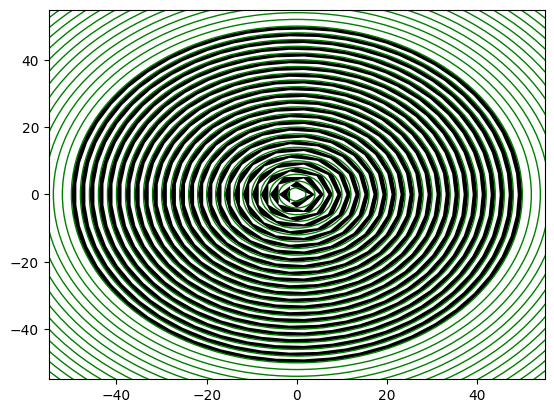

In [ ]:

n = int(input("Cantidad de fractales: "))

def polinomio(n):
  x = n * np.cos(np.linspace(0, 2 * np.pi, n + 1))
  y = n * np.sin(np.linspace(0, 2 * np.pi, n + 1))
  return x, y

def circunferencia(d, factor_escala):
  circle = plt.Circle((0, 0), d * factor_escala, color='g', fill=False)
  return circle

fig, ax = plt.subplots()

for i in range(n):
  x, y = polinomio(n)

  if i % 2 == 0:
    ax.fill(x, y, "black")
  else:
    ax.fill(x, y, "white")

  circle = circunferencia(n, 2)
  ax.add_artist(circle)

  n = n - 1


##FGO

In [ ]:
z = parse_expr('z')
f =  parse_expr(input("Digita la FGO f(z)="))
print(display(Math(sp.latex(f))))
Fz=Poly(f.series(x=z, x0=0, n=15).removeO())
fn=Fz.all_coeffs()
print('Sucesión, o secuencia, generada\n',fn[::-1])

Digita la FGO f(z)=Z/(Z+1)**2


<IPython.core.display.Math object>

None


PolynomialError: ignored

##FGE

In [ ]:
n=int(input('Dame el n: ')) #Esto tiene que recibirlo por entrada del usuario 
fact=np.zeros(n,dtype=int)
for x in range(n):
  fact[x]=sp.factorial(x)
z = parse_expr('z')
f =  parse_expr(input("Digita la FGO F(z)="))
print(display(Math(sp.latex(f))))
Fz=Poly(f.series(x=z, x0=0, n=n).removeO())
fn=Fz.all_coeffs()
fn=np.multiply(fn[::-1],fact)
print('Sucesión, o secuencia, generada por la FGO, F(z) \n',fn)

##  Gráfica de las FGO y secuencias de la Tabla 1

In [ ]:
def FGO(orden, expresion):
  z = parse_expr('z')
  f =  parse_expr(expresion)
  Fz=Poly(f.series(x=z, x0=0, n=orden).removeO())
  fn=Fz.all_coeffs()
  return fn[::-1]

### $F(z)=\frac{1}{1-z}$

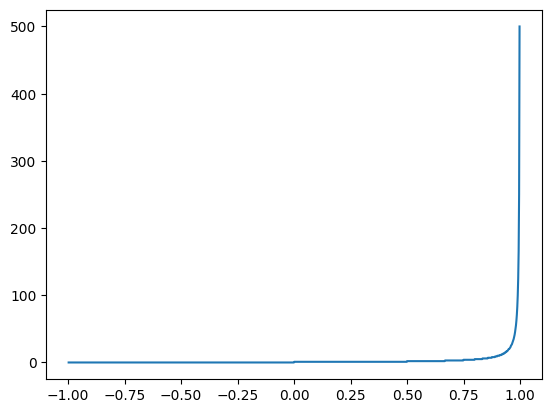

In [ ]:
n = np.linspace(-1,1, 1002)[1:-1]
f = (1)//(1-n)
plt.plot(n, f)

Digite el orden: 4
[1, 1, 1, 1]


<StemContainer object of 3 artists>

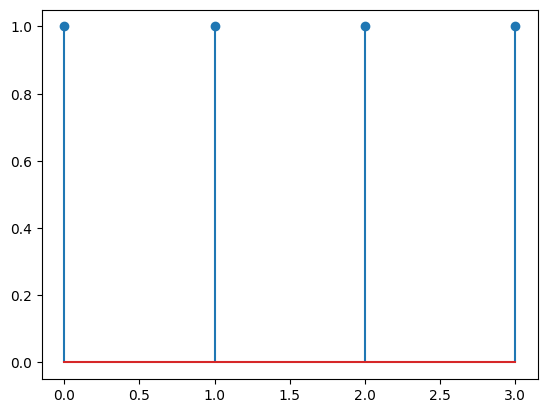

In [ ]:
n = int(input("Digite el orden: "))
expr = "(1)/(1-z)"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)= \frac{z}{(z-1)^2}$

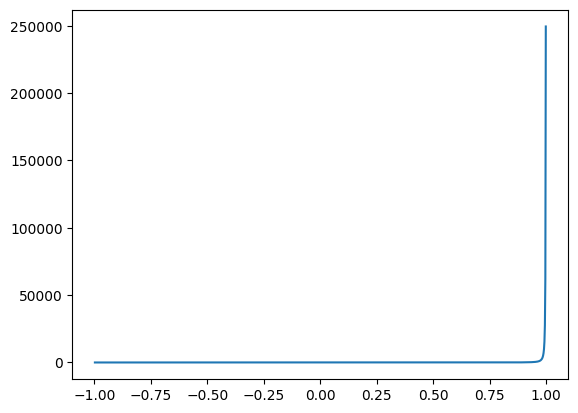

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (1)//((1-n)**2)
plt.plot(n, f)

Digite el orden: 6
[0, 1, 2, 3, 4, 5]


<StemContainer object of 3 artists>

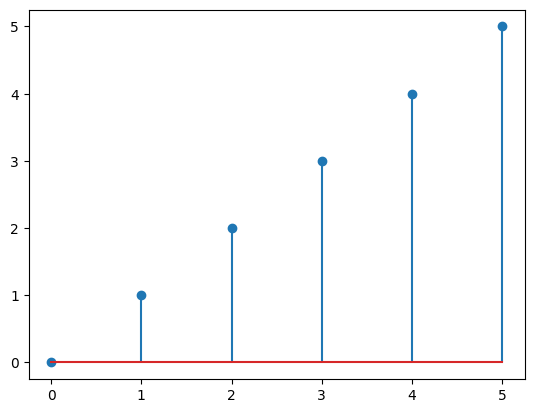

In [ ]:
n = int(input("Digite el orden: "))
expr = "(z)/((1-z)**2)"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=\frac{z^2}{(1-z)^3}$

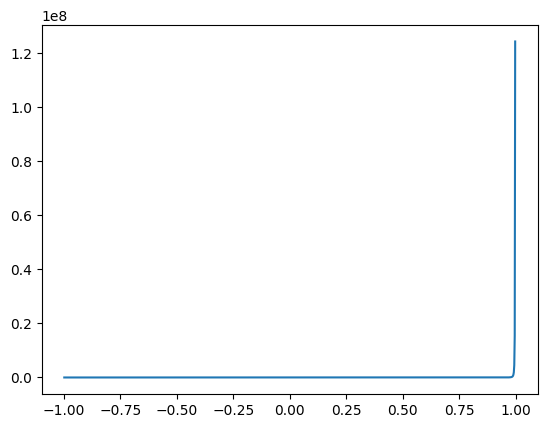

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (n**2)//((1-n)**3)
plt.plot(n, f)

Digite el orden: 15
[0, 0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91]


<StemContainer object of 3 artists>

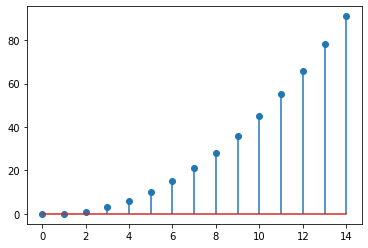

In [ ]:
n = int(input("Digite el orden: "))
expr = "(z**2)/((1-z)**3)"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=\frac{z^m}{(1-z)^{m+1}}$

Digita el valor de m: 2


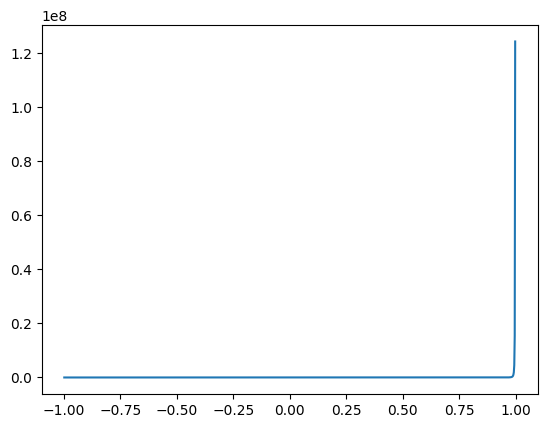

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
m = int(input("Digita el valor de m: "))
f = (n**m)/((1-n)**(m+1))
plt.plot(n, f)

Digite el orden: 15
Digite el valor de m: 2
[0, 0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91]


<StemContainer object of 3 artists>

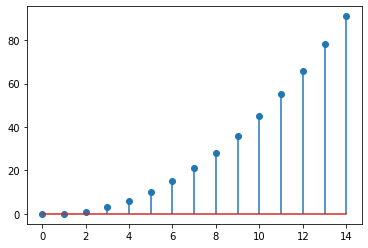

In [ ]:
n = int(input("Digite el orden: "))
m = int(input("Digite el valor de m: "))
expr = f"(z**{m})/((1-z)**({m}+1))"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=\frac{1}{(1-z)^m}$

Digita el valor de m: 2


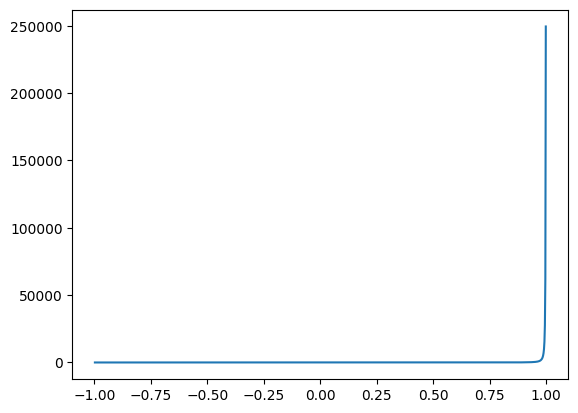

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
m = int(input("Digita el valor de m: "))
f = (1)//((1-n)**m)
plt.plot(n, f)

Digite el orden: 15
Digite el valor de m: 3
[1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120]


<StemContainer object of 3 artists>

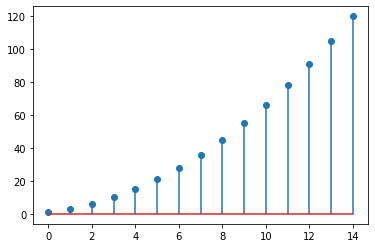

In [ ]:
n = int(input("Digite el orden: "))
m = int(input("Digite el valor de m: "))
expr = f"(1)/((1-z)**{m})"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=\frac{1}{1-z^2}$

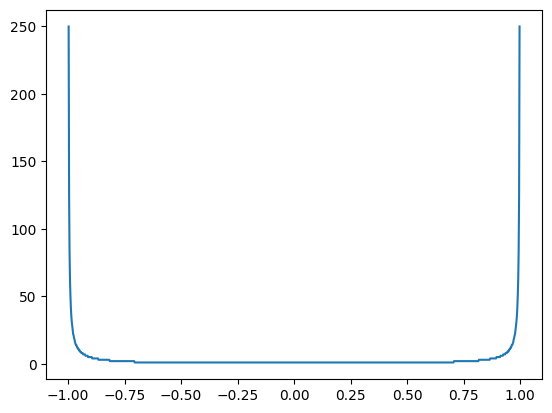

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (1)//(1-(n**2))
plt.plot(n, f)

<ipython-input-50-d5496d8c104e>:2: RuntimeWarning: divide by zero encountered in floor_divide
  f = (1)//(1-(n**2))


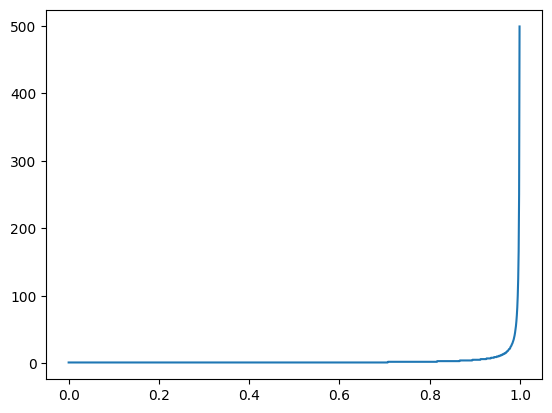

In [ ]:
n = np.linspace(0,1, 1000)
f = (1)//(1-(n**2))
plt.plot(n, f)

Digite el orden: 15
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


<StemContainer object of 3 artists>

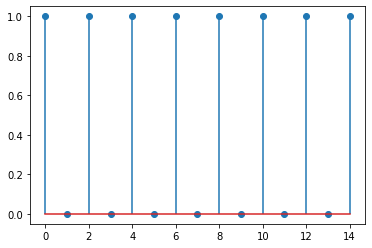

In [ ]:
n = int(input("Digite el orden: "))
expr = "(1)/(1-z**2)"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=\frac{1}{1-2z}$

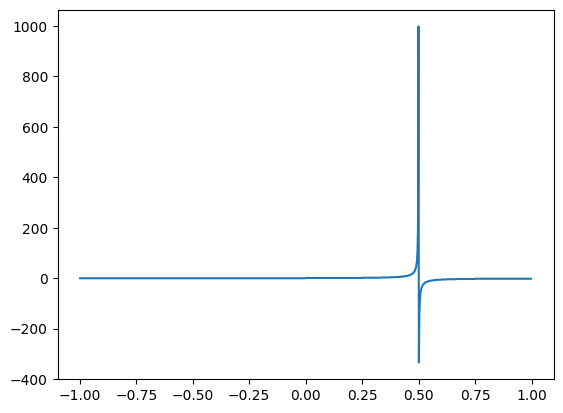

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (1)//(1-2*n)
plt.plot(n, f)

Digite el orden: 15
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


<StemContainer object of 3 artists>

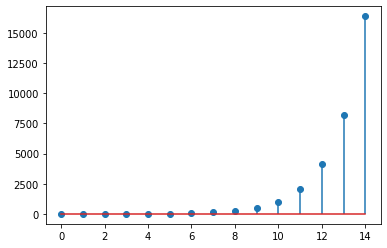

In [ ]:
n = int(input("Digite el orden: "))
expr = "(1)/(1-2*z)"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=\frac{1}{1-cz}$

Digita el valor de c: 2


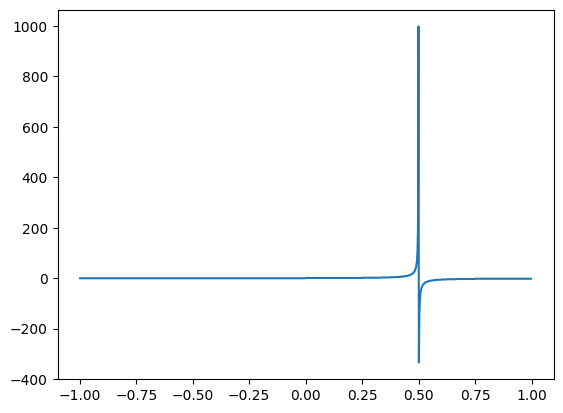

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
c = int(input("Digita el valor de c: "))
f = (1)//(1-c*n)
plt.plot(n, f)

### Si c=2

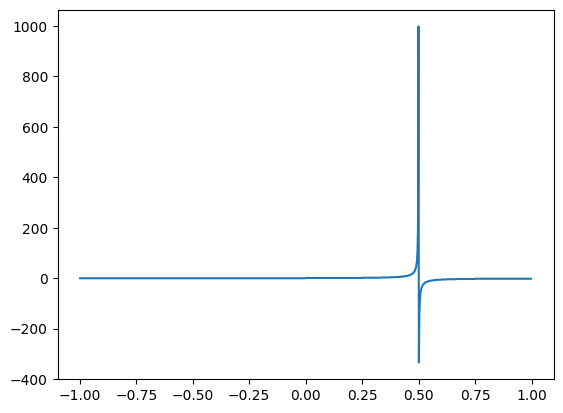

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (1)//(1-2*n)
plt.plot(n, f)

### c=3

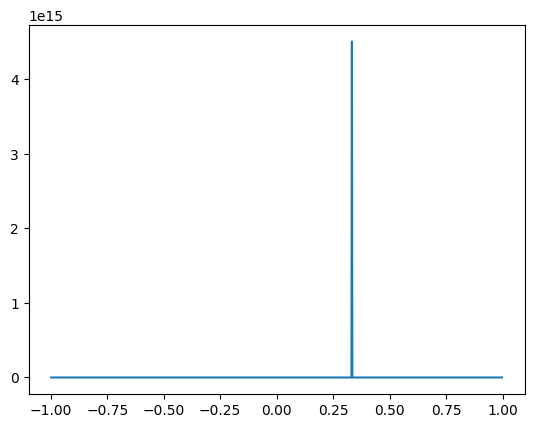

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (1)//(1-3*n)
plt.plot(n, f)

### Si C = 8

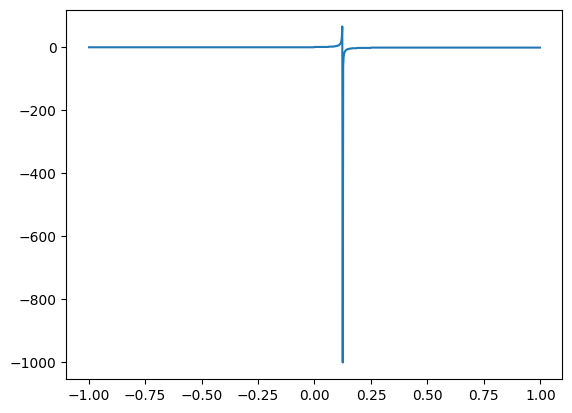

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = (1)//(1-8*n)
plt.plot(n, f)

### Secuencia


Digite el orden: 20
Digite el valor de c: 2
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]


<StemContainer object of 3 artists>

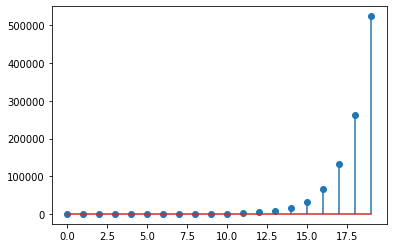

In [ ]:
n = int(input("Digite el orden: "))
c = int(input("Digite el valor de c: "))
expr = f"(1)/(1-{c}*z)"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=(1+z)^m$

Digita el valor de m: 2


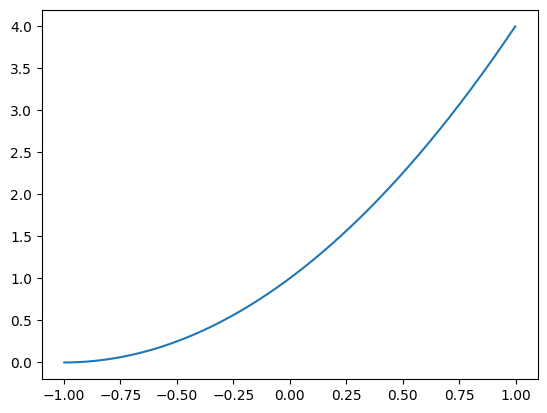

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
m = int(input("Digita el valor de m: "))
f = (1+n)**m
plt.plot(n, f)

Digite el orden: 15
Digite el valor de c: 3
[1, 3, 3, 1]


<StemContainer object of 3 artists>

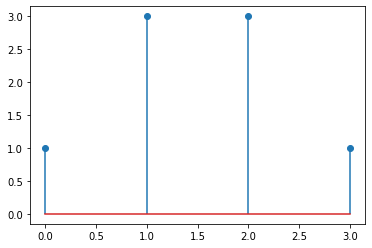

In [ ]:
n = int(input("Digite el orden: "))
c = int(input("Digite el valor de c: "))
expr = f"((1+z)**{m})"
array = FGO(n, expr)
print(array)
plt.stem(array)

### $F(z)=ln\left(\frac{1}{1-z}\right)$

<ipython-input-63-a8d39870f030>:2: RuntimeWarning: divide by zero encountered in log
  f = np.log((1)//(1-n))


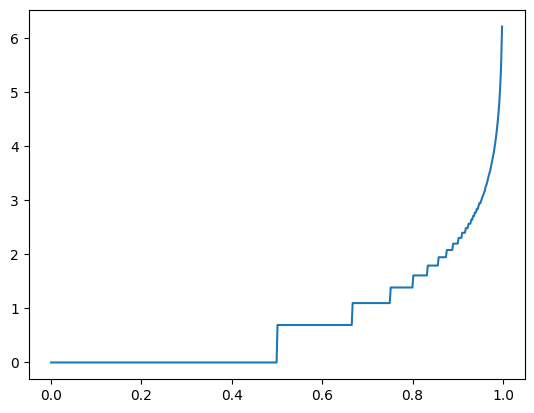

In [ ]:
n = np.linspace(-1,1, 1000)[1:-1]
f = np.log((1)//(1-n))
plt.plot(n, f)

Digite el orden: 15
[0, 1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14]


<StemContainer object of 3 artists>

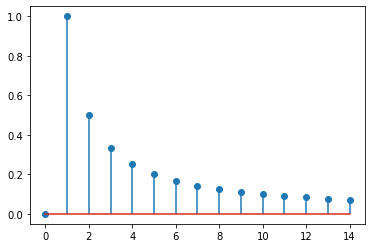

In [ ]:
n = int(input("Digite el orden: "))
expr = "log((1)/(1-z))"
array = FGO(n, expr)
print(array)
plt.stem(array)

## Gráfica de gradiente 2D
Este punto se hizo con ayuda de Chat GPT

Ingrese la función a optimizar: x**2


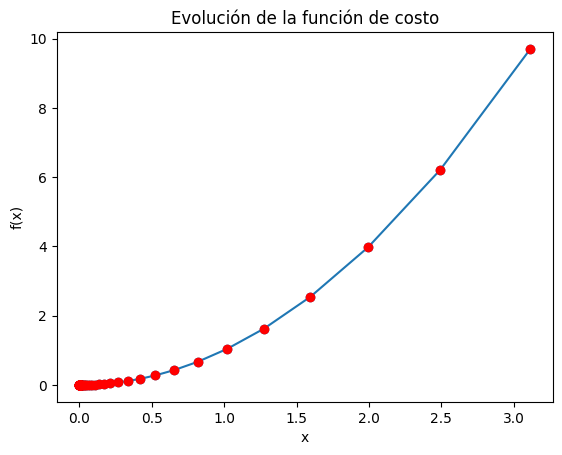

In [ ]:
# Pedir la función al usuario
funcion = input("Ingrese la función a optimizar: ")

# Definir la función de costo y su derivada
def f(x):
    return eval(funcion)

def df(x):
    h = 1e-8
    return (f(x+h) - f(x))/h

# Inicializar los parámetros del algoritmo
learning_rate = 0.1
num_iterations = 50
x = np.random.uniform(-5, 5)

# Listas para almacenar los valores de x y f(x) en cada iteración
x_values = [x]
f_values = [f(x)]
# Aplicar el método de gradiente descendente
for i in range(num_iterations):
    # Calcular la derivada de la función en el punto actual
    grad = df(x)
    # Actualizar x
    x = x - learning_rate * grad
    # Agregar los nuevos valores de x y f(x) a las listas
    x_values.append(x)
    f_values.append(f(x))

# Graficar la evolución de x y f(x) en cada iteración
plt.plot(x_values, f_values, '-o')
plt.plot(x_values, f_values, 'o', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Evolución de la función de costo')


## Gráfica 3D en coordenadas rectangulares, polares y cilíndricas

Este punto se hizo con ayuda de Chat GPT



Ingresa una fórmula: 4+y**2-x**2


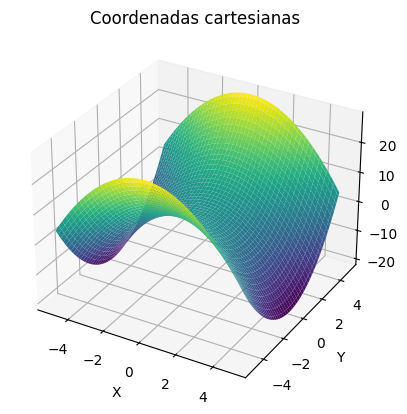

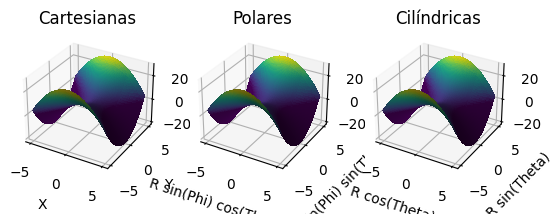

In [ ]:
def create_esfera():
    # Definimos la fórmula de una esfera cerrada
    def esfera(x, y, z, r):
        return x**2 + y**2 + z**2 - r**2

    # Pedimos al usuario que ingrese el radio de la esfera
    r = float(input("Ingresa el radio de la esfera: "))

    # Creamos los valores para el eje X, Y y Z
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))

    # Creamos el gráfico 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='blue', alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Coordenadas rectangulares')

    # Convertir a coordenadas polares
    R = np.sqrt(x**2 + y**2 + z**2)
    Theta = np.arctan2(y, x)
    Phi = np.arccos(z / R)

    # Crear una figura 3D
    fig = plt.figure()

    # Graficar en coordenadas polares
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(R*np.sin(Phi)*np.cos(Theta), R*np.sin(Phi)*np.sin(Theta), R*np.cos(Phi), cmap='viridis', edgecolor='none', alpha=0.6)
    ax.set_xlabel('R sin(Phi) cos(Theta)')
    ax.set_ylabel('R sin(Phi) sin(Theta)')
    ax.set_zlabel('R cos(Phi)')
    ax.set_title('Coordenadas polares')

    # Convertir a coordenadas cilíndricas
    Rc = np.sqrt(x**2 + y**2)
    Theta = np.arctan2(y, x)

    # Crear una figura 3D
    fig = plt.figure()

    # Graficar en coordenadas cilíndricas
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(Rc*np.cos(Theta), Rc*np.sin(Theta), z, color='red', alpha=0.5)
    ax.set_xlabel('R cos(Theta)')
    ax.set_ylabel('R sin(Theta)')
    ax.set_zlabel('Z')
    ax.set_title('Coordenadas cilindricas')
# Pedimos al usuario que ingrese una fórmula
formula = input("Ingresa una fórmula: ")

if(formula == "x**2 + y**2" or 
   formula == "x**2+y**2" or 
   formula == "x**2 + y**2 + z**2" or 
   formula == "x**2+y**2+z**2"):
  create_esfera()
else:
  # Creamos una función que evalúa la fórmula en un rango de valores
  def evaluar_formula(formula, x, y):
      z = eval(formula)
      return z

  # Creamos los valores para el eje X y el eje Y
  x = np.linspace(-5, 5, 100)
  y = np.linspace(-5, 5, 100)
  X, Y = np.meshgrid(x, y)

  # Evaluamos la fórmula en los valores X e Y
  Z = evaluar_formula(formula, X, Y)
  F = Z

  # Creamos el gráfico 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Coordenadas cartesianas')

  # Convertir a coordenadas polares y cilíndricas
  R = np.sqrt(X**2 + Y**2 + Z**2)
  Rc = np.sqrt(X**2 + Y**2)
  Theta = np.arctan2(Y, X)
  Phi = np.arctan2(np.sqrt(X**2 + Y**2), Z)

  # Crear una figura 3D
  fig = plt.figure()

  # Graficar en coordenadas cartesianas
  ax = fig.add_subplot(131, projection='3d')
  ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(F/F.max()), rstride=1, cstride=1, linewidth=0, antialiased=False)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Cartesianas')

  # Graficar en coordenadas polares
  ax = fig.add_subplot(132, projection='3d')
  ax.plot_surface(R*np.sin(Phi)*np.cos(Theta), R*np.sin(Phi)*np.sin(Theta), R*np.cos(Phi), facecolors=plt.cm.viridis(F/F.max()), rstride=1, cstride=1, linewidth=0, antialiased=False)
  ax.set_xlabel('R sin(Phi) cos(Theta)')
  ax.set_ylabel('R sin(Phi) sin(Theta)')
  ax.set_zlabel('R cos(Phi)')
  ax.set_title('Polares')

  # Graficar en coordenadas cilíndricas
  ax = fig.add_subplot(133, projection='3d')
  ax.plot_surface(Rc*np.cos(Theta), Rc*np.sin(Theta), Z, facecolors=plt.cm.viridis(F/F.max()), rstride=1, cstride=1, linewidth=0, antialiased=False)
  ax.set_xlabel('R cos(Theta)')
  ax.set_ylabel('R sin(Theta)')
  ax.set_zlabel('Z')
  ax.set_title('Cilíndricas')

## RRLHCCC y RRLNHCCC
Este código fue hecho con ayuda de chat GPT para aprender que funciones ya existen que puedan resolver un sistema de ecuaciones y se evalue la recurrencia 


In [ ]:
def RRLHCCC_RRLNHCCC(funcion,valores_iniciales):
    n = sp.symbols('n') 
    # concatenamos "f(n)" a la relación de recurrencia, es como pasar el f(n): a la derecha
    recurrencia_input_con_prefijo =  funcion.strip()+"-f(n)" 
    f = sp.Function('f')
    # Evaluamos la relacion de recurrencia
    recurrencia = eval(recurrencia_input_con_prefijo)
    #Obtener la ecuación general 
    ecuacion_general = sp.rsolve(recurrencia, f(n))
    #hacemos el sistema de ecuaciones para encontrar la constantes
    sistema_ecuaciones = []

    #Genera el sistema de ecuaciones dependiendo de los valores iniciales f(0),f(1)...
    """
     El objeto zip se utiliza en el ciclo for para recorrer simultáneamente
    los índices y los valores iniciales de la relación de recurrencia y
    generar el sistema de ecuaciones correspondiente.
    
    """
    for k, a_k in zip(range(len(valores_iniciales)), valores_iniciales):
      """
      Se implementa la operacion subs(n, k) - a_k para generar el sistema de
      ecuaciones lineales a partir de la ecuación general de la relación de
      recurrencia y los valores iniciales dados.
      """
      sistema_ecuaciones.append(ecuacion_general.subs(n, k) - a_k)

    #Resolvemos el sistema de ecuaciones
    constantes = sp.solve(sistema_ecuaciones)
    #reemplazamos en la ecuacion general
    solucion_general = ecuacion_general.subs(constantes)
    #retorna la solucion general con las constantes en entorno Latex para mas comprensión 
    return print(display(Math(sp.latex(solucion_general))))

### Plus: Hallar la no recurrente a partir de una sucesión o una FGO

In [ ]:
def sucesion(secuencia):
  n = sp.symbols('n')
  # Si la cadena ingresada es un string, se convierte en lista de enteros
  if type(secuencia) != list:
    secuencia = [int(x.strip()) for x in secuencia.split(",")]

  # Se halla los coeficientes de la función recurrente
  coeficientes = sp.sequence(secuencia, (n, 1, len(secuencia))).find_linear_recurrence(len(secuencia))

  cadena = ""
  valor_inicial = ""

  #Se escribe la función recurrente con los coeficientes encontrados
  #y se crea una lista con los valores iniciales
  for i in range(len(coeficientes)):
    if coeficientes[i] != 0:
      if i == 0:
        cadena = f"{coeficientes[i]}*f(n-{i+1})"
        valor_inicial = f"{secuencia[i]}"
      else:
        cadena = cadena + f"+{coeficientes[i]}*f(n-{i+1})"
        valor_inicial = valor_inicial + f",{secuencia[i]}"
  
  # Se escribe la función recurrente obtenida 
  print("\n", display(Math(sp.latex(cadena))), "\n")
  print("Valores iniciales: ",valor_inicial, "\n")
  valor_inicial = [int(val.strip()) for val in valor_inicial.split(",")]
  R = RRLHCCC_RRLNHCCC(cadena,valor_inicial)
  return R

In [ ]:
def FGO2(orden, expresion):
  z = parse_expr('z')
  f =  parse_expr(expresion)
  print(display(Math(sp.latex(f))))
  Fz=Poly(f.series(x=z, x0=0, n=orden).removeO())
  fn=Fz.all_coeffs()
  return fn[::-1]

In [ ]:
def noRecurrente(orden, expresion):
  n = sp.symbols('n')
  secuencia = []
  for i in range(orden):
    valor = sp.sympify(expresion).subs(n, i)
    secuencia.append(valor)
  print(secuencia)
  return secuencia

### Menu

In [ ]:
print("Para obtener la función no recurrente, ¿Cómo la desea hallar?")
print("1. A través de función recurrente")
# Plus
print("2. A través de una secuencia")
print("3. A traves de una FGO")
print("\n4.Si ya tienes una no recurrente y quieres saber su recurrente")

print("\n")
res = int(input())
while (res < 1 or res > 4):
  res = int(input("Error, intente nuevamente: "))

if res == 1:
  #Se le pregunta al usuario la relacion de recurrencia evaluada en f(n) por ejemplo: 2*f(n-1)+f(n-1)
  recurrencia= input("Ingresa la relación de recurrencia en términos de f(n): ")
  # Pedir los valores iniciales al usuario
  valores_iniciales = input("Valores iniciales (Ejemplo: si es f(0)=1 y f(1)=2, ponga 1,2): ")

  #Se crea una lista para contener los valores iniciales.
  # La función strip() se utiliza para eliminar los espacios en blanco alrededor de cada valor ingresado
  valores_iniciales = [int(val.strip()) for val in valores_iniciales.split(",")]

  #LLamamos la funcion con los parametros 
  R=RRLHCCC_RRLNHCCC(recurrencia,valores_iniciales)

elif res == 2:
  secuencia = input("Ingrese la secuencia: ")
  R = sucesion(secuencia)

elif res == 3:
  expr = input("Digite la FGO: ")
  n = int(input("Digite el orden: "))
  array = FGO2(n, expr)
  print("\nLa sucesión es: ")
  print(array)
  R = sucesion(array)

elif res ==4:
  #Se le pregunta al usuario la funcion no recurrenteevaluada en f(n) por ejemplo: n+1
  noR= input("Ingresa la funcion no recurrente en términos de f(n): ")
  n = int(input("Digite el orden: "))
  secuencia = noRecurrente(n, noR)
  R = sucesion(secuencia)

Para obtener la función no recurrente, ¿Cómo la desea hallar?
1. A través de función recurrente
2. A través de una secuencia
3. A traves de una FGO

4.Si ya tienes una no recurrente y quieres saber su recurrente


1
Ingresa la relación de recurrencia en términos de f(n): 2*f(n-1)+f(n-2)
Valores iniciales (Ejemplo: si es f(0)=1 y f(1)=2, ponga 1,2): 1,2


<IPython.core.display.Math object>

None


## Tensores

In [ ]:
print("1. Tensor vector")
print("2. Tensor matriz")
print("3. Tensor rango 3")
print("4. Tensor rango 4")
print("5. Tensor rango 5")
print("6. Tensor rango 6")

res = int(input("Que tipo de tensor quieres: "))
while (res <1 or res > 6):
  res = int(input("Error, intenta nuevamente: "))

print("\n")
if res == 1:
  tam = int(input("Ingrese el tamaño (ej: 3): "))
  vector = np.random.randint(low=0, high=10, size=(tam))
  vector = '\n'.join(str(elemento) for elemento in vector)
  print(vector)

elif res == 2:
  tam = input("Ingrese el tamaño (ej: 3x4): ")
  n, m = tam.split("x")
  n,m = int(n,m)
  m = int(m)
  matriz = np.random.randint(low=0, high=10, size=(n, m))
  print(matriz)

elif res == 3:
  tam = input("Ingrese el tamaño (ej: 2x3x4): ")
  n, m, k = tam.split("x")
  n = int(n)
  m = int(m)
  k = int(k)

  n3 = np.random.randint(low=0, high=10, size=(n, m, k))
  print(n3)

elif res == 4:
  print("Ingrese el tamaño\nEjemplo: 2x3x4x5 quiere decir 2 cubos, 3 capas, 4 filas y 5 columnas")
  tam = input()
  n, m, k,l = tam.split("x")
  n = int(n)
  m = int(m)
  k = int(k)
  l = int(l)

  n4 = np.random.randint(low=0, high=10, size=(n, m, k, l))
  print(n4)

elif res == 5:
  print("Ingrese el tamaño\nEjemplo: 1x2x3x4x5 quiere decir 1 matriz de 2 cubos con 3 capas, 4 filas y 5 columnas")
  tam = input()
  n, m, k,l, r = tam.split("x")
  n = int(n)
  m = int(m)
  k = int(k)
  l = int(l)
  r = int(r)

  n5 = np.random.randint(low=0, high=10, size=(n, m, k, l, r))
  print(n5)

elif res == 6:
  print("Ingrese el tamaño\nEjemplo: 1x2x3x4x5x6 quiere decir 1 cubo de 2 matrices compuestas por 3 cubos con 4 capas, 5 filas y 6 columnas")
  tam = input()
  n, m, k,l, r, w = tam.split("x")
  n = int(n)
  m = int(m)
  k = int(k)
  l = int(l)
  r = int(r)
  w = int(w)

  n6 = np.random.randint(low=0, high=10, size=(n, m, k, l, r, w))
  print(n6)

1. Tensor vector
2. Tensor matriz
3. Tensor rango 3
4. Tensor rango 4
5. Tensor rango 5
6. Tensor rango 6
Que tipo de tensor quieres: 3


Ingrese el tamaño (ej: 2x3x4): 2x3x4
[[[2 7 0 2]
  [4 6 1 2]
  [3 0 5 8]]

 [[4 9 6 6]
  [5 2 1 6]
  [7 0 3 8]]]


#Entregable 2: COLECCIONISTA
Este punto fue hecho con ayuda de ChatGPT

###Arreglos del dataframe

In [ ]:
# Pedir al usuario el directorio del archivo CSV
csv_path = input("Ingrese el directorio del archivo CSV:\n(Ejemplo: /content/World_Cup_players_Dataset_World_Cup_players_Dataset_csv.csv)\n")

# Leer el archivo CSV
df = pd.read_csv(csv_path)

# Reemplazar los valores faltantes de 'Probabilidad' con 0 y renombrar las columnas
df['Probability'].fillna(0, inplace=True)

# Crear un nuevo DataFrame con las columnas de interés
df = df.rename(columns={'Player': 'nombre', 'Probability': 'Probabilidad', 'National team': 'Seleccion'})
df_new = df.loc[:, ['nombre', 'Probabilidad', 'Seleccion']]
print("\nLa probabilidad total es:", df['Probabilidad'].sum())

# Guardar el nuevo DataFrame como un archivo CSV en /content de Google Colab
df_new.to_csv('df_new.csv', index=False)

df=df_new
df_new.head(10)

Ingrese el directorio del archivo CSV:
(Ejemplo: /content/World_Cup_players_Dataset_World_Cup_players_Dataset_csv.csv)
/content/World_Cup_players_Dataset_World_Cup_players_Dataset_csv.csv

La probabilidad total es: 0.9919520706171


,nombre,Probabilidad,Seleccion
0,Alisson,0.001666,Brazil
1,Ederson,0.005413,Brazil
2,Weverton,0.001815,Brazil
3,Alex Sandro,0.005548,Brazil
4,Alex Telles,0.001465,Brazil
5,Dani Alves,0.005857,Brazil
6,Danilo,0.004469,Brazil
7,Bremer,0.003854,Brazil
8,Éder Militão,0.003010,Brazil
9,Marquinhos,0.001227,Brazil


## Punto 1

In [ ]:

def simulacion(N,df):
  # Definimos la función auxiliar para comprar láminas
  def comprar_laminas(df):

    # Creamos una lista para guardar las láminas obtenidas
    laminas_obtenidas = []

    # Calculamos las probabilidades normalizadas de cada lámina
    probs_norm = df['Probabilidad'] / df['Probabilidad'].sum()

    # Hacemos un loop hasta obtener una lámina repetida
    while True:

      # Elegimos una lámina aleatoriamente con las probabilidades normalizadas
      nueva_lamina = np.random.choice(df['nombre'], p=probs_norm)

      # Si la lámina ya fue obtenida, terminamos el loop y retornamos la cantidad de láminas obtenidas
      if nueva_lamina in laminas_obtenidas:
        return len(laminas_obtenidas)

      # Si la lámina no fue obtenida antes, la agregamos a la lista y continuamos el loop
      else:
        laminas_obtenidas.append(nueva_lamina)

  # Llamamos a la función 'comprar_laminas' N veces y guardamos los resultados en una lista
  num_laminas = [comprar_laminas(df) for _ in range(N)]

  # Creamos un histograma con la lista de números de láminas
  plt.hist(num_laminas, bins=range(1, max(num_laminas)+1))
  plt.xlabel('Número de láminas')
  plt.ylabel('Frecuencia')
  plt.title('Histograma de número de láminas necesarias para completar el álbum con '+  str(N)+' simulaciones')

  # Calculamos la media, moda y mediana
  media = np.mean(num_laminas)
  moda = np.argmax(np.bincount(num_laminas))
  mediana = np.median(num_laminas)

  # Mostramos las líneas verticales correspondientes en el histograma
  plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.2f}')
  plt.axvline(moda, color='g', linestyle='--', label=f'Moda = {moda:.2f}')
  plt.axvline(mediana, color='b', linestyle='--', label=f'Mediana = {mediana:.2f}')
  plt.legend()
  plt.show()

  # Llamamos a la función 'comprar_laminas' hasta obtener una lámina repetida y guardamos los resultados en una lista
  laminas_obtenidas_p = []
  while True:
    nueva_lamina = comprar_laminas(df)
    if nueva_lamina in laminas_obtenidas_p:
      break
    else:
      laminas_obtenidas_p.append(nueva_lamina)

  # Creamos un histograma con la lista de números de láminas antes de la repetición
  plt.hist(laminas_obtenidas_p, bins=range(1, max(laminas_obtenidas_p)+1))
  plt.xlabel('Número de láminas')
  plt.ylabel('Frecuencia')
  plt.title('Histograma de número de láminas necesarias para obtener la primera lámina repetida con '+ str(N)+' simulaciones')
  media = np.mean(laminas_obtenidas_p)
  moda = np.argmax(np.bincount(laminas_obtenidas_p))
  mediana = np.median(laminas_obtenidas_p)

  # Mostramos los resultados en la gráfica
  plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.2f}')
  plt.axvline(moda, color='g', linestyle='--', label=f'Moda = {moda:.2f}')
  plt.axvline(mediana, color='b', linestyle='--', label=f'Mediana = {mediana:.2f}')
  plt.legend()
  plt.show()
  # Llamamos a la función 'comprar_laminas' hasta obtener una lámina repetida
  laminas_obtenidas = []
  while True:
      nueva_lamina = comprar_laminas(df)
      if nueva_lamina in laminas_obtenidas:
          break
      else:
         laminas_obtenidas.append(nueva_lamina)

  # Creamos un histograma con la lista de números de láminas repetidas
  plt.hist(laminas_obtenidas, bins=range(1, max(laminas_obtenidas)+1))
  plt.xlabel('Cantidad de láminas repetidas')
  plt.ylabel('Frecuencia')
  plt.title('Histograma de cantidad de láminas repetidas con '+  str(N)+' simulaciones')

  # Calculamos la media, moda y mediana
  media = np.mean(laminas_obtenidas)
  moda = np.argmax(np.bincount(laminas_obtenidas))
  mediana = np.median(laminas_obtenidas)

  # Mostramos los resultados en la gráfica
  plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.2f}')
  plt.axvline(moda, color='g', linestyle='--', label=f'Moda = {moda:.2f}')
  plt.axvline(mediana, color='b', linestyle='--', label=f'Mediana = {mediana:.2f}')
  plt.legend()
  plt.show()


###Mostrar las simulaciones:

### Dada una lista

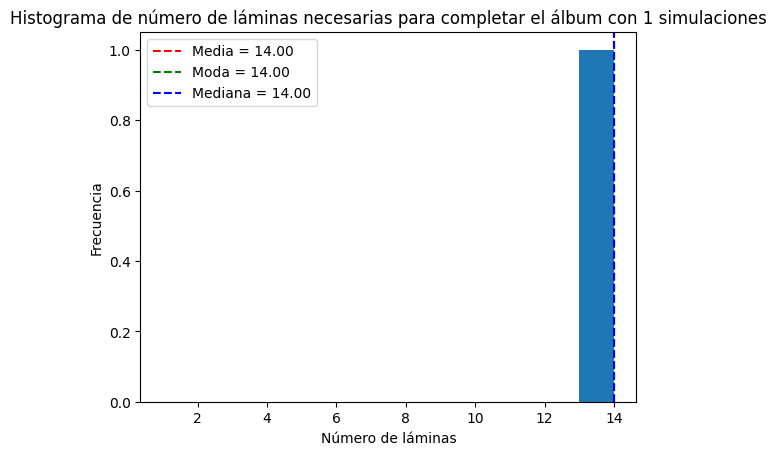

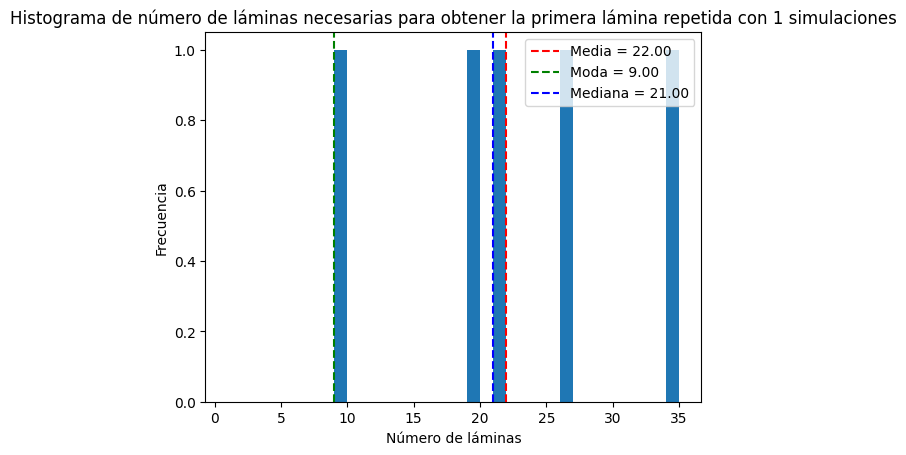

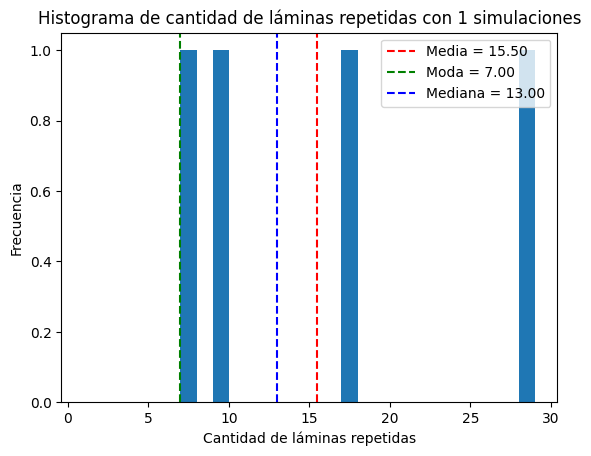

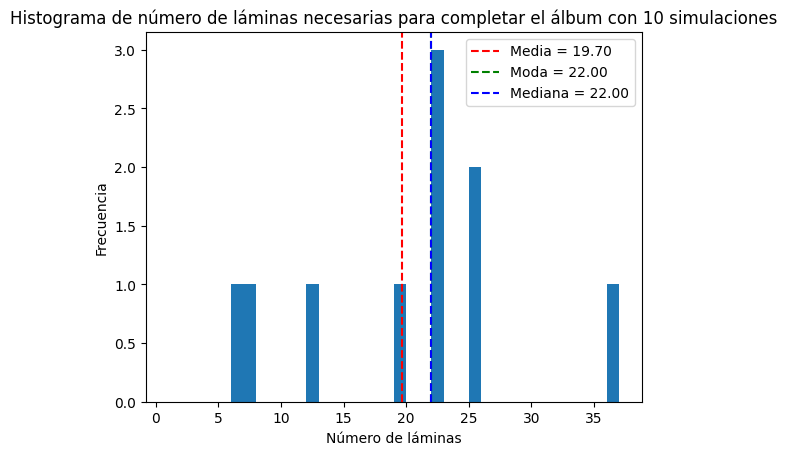

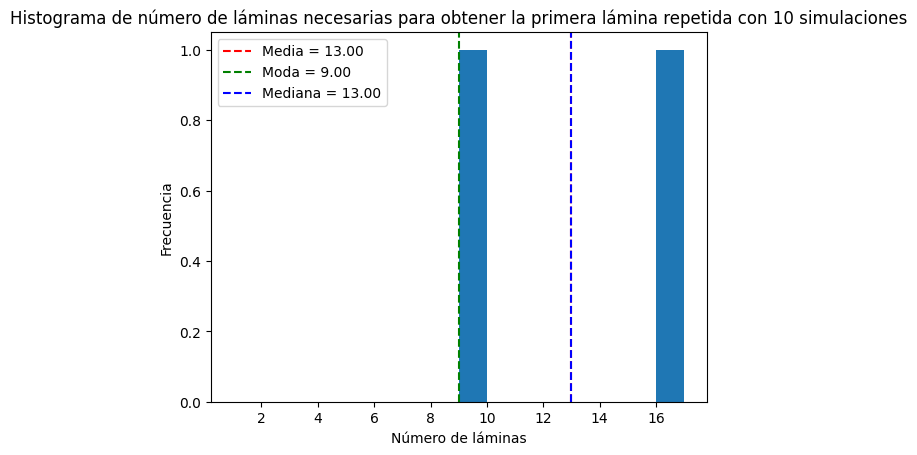

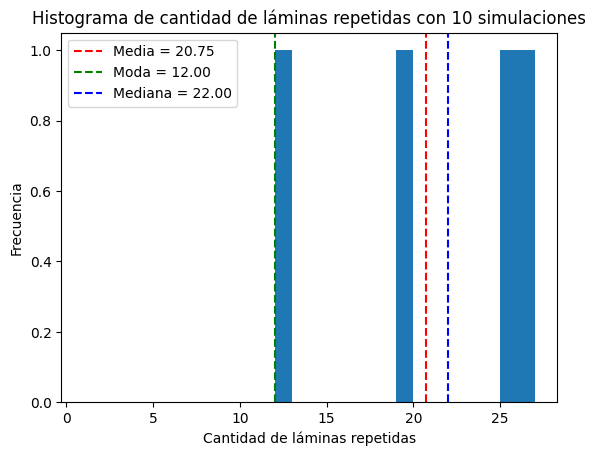

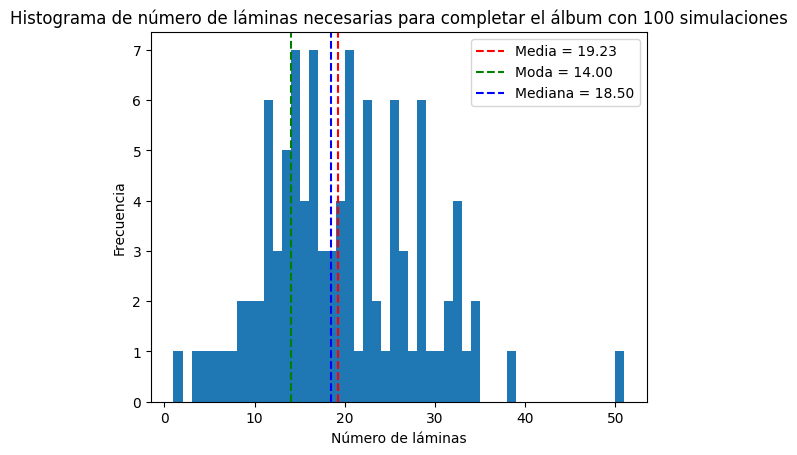

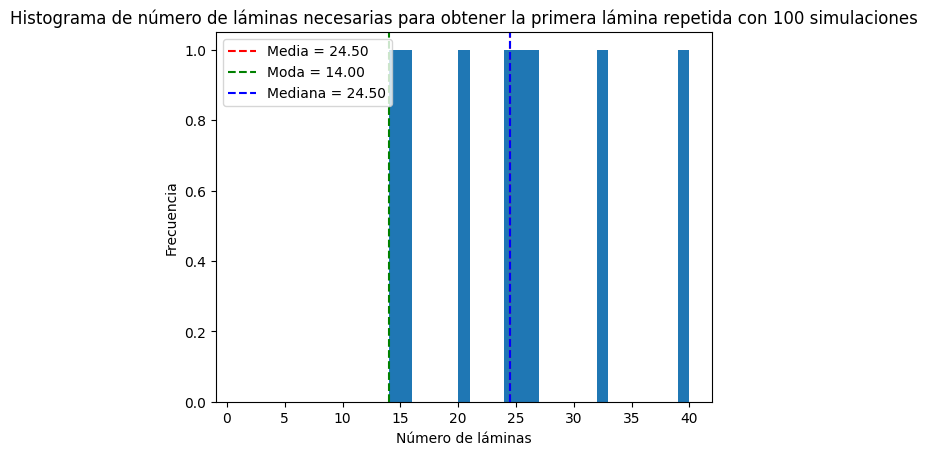

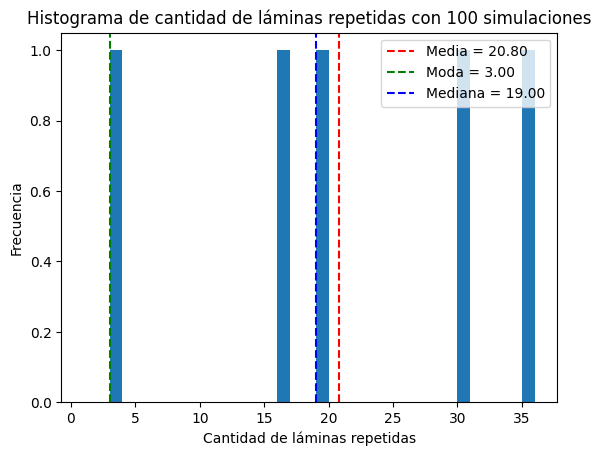

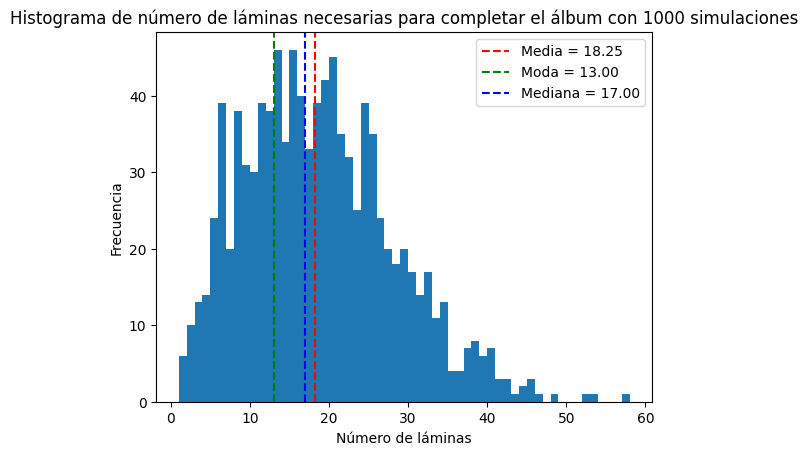

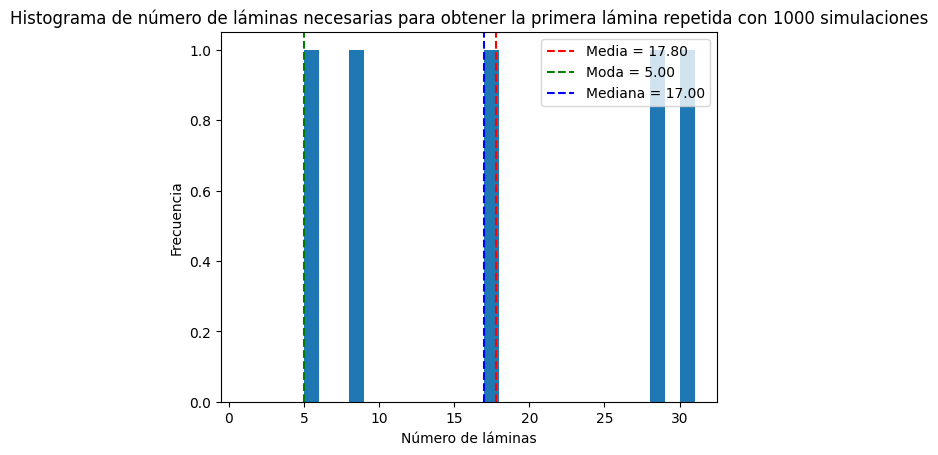

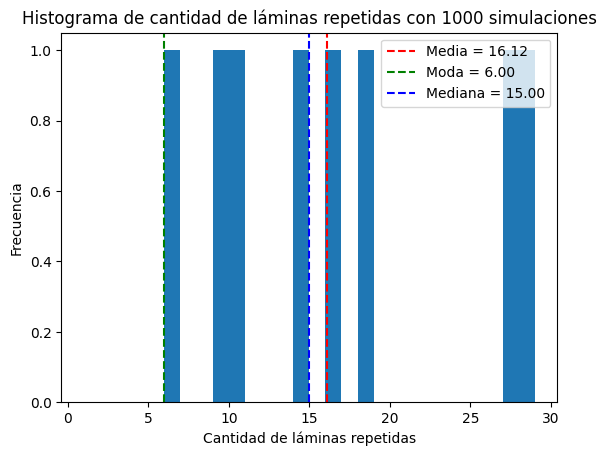

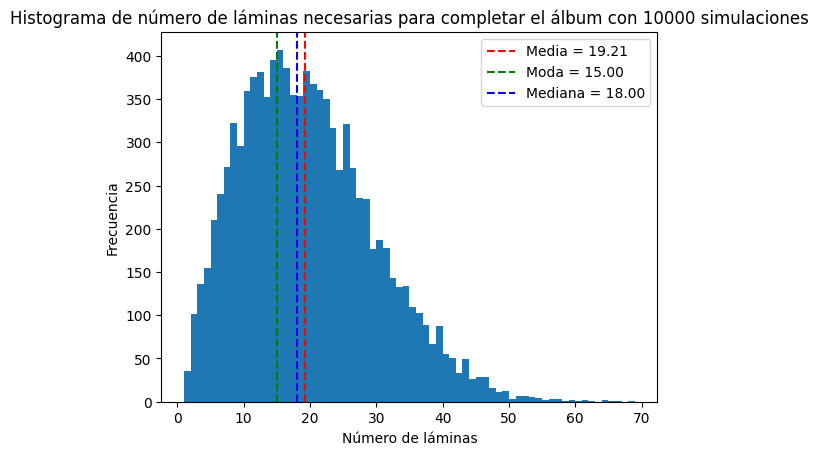

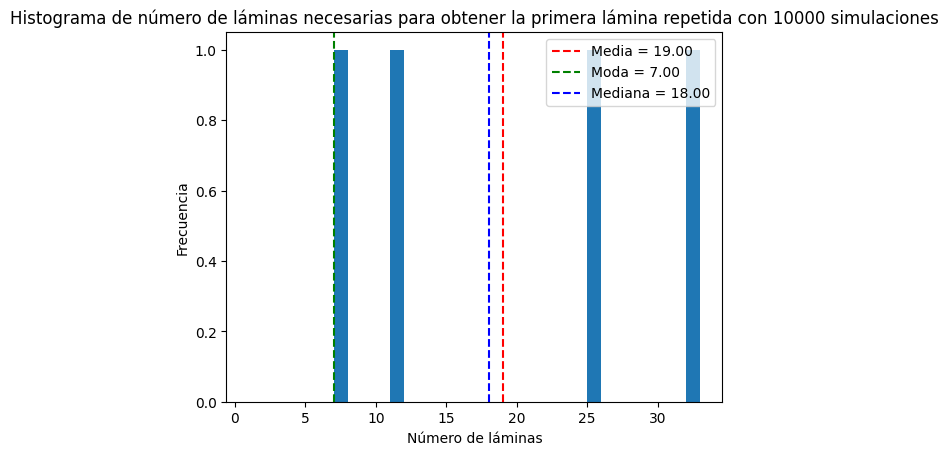

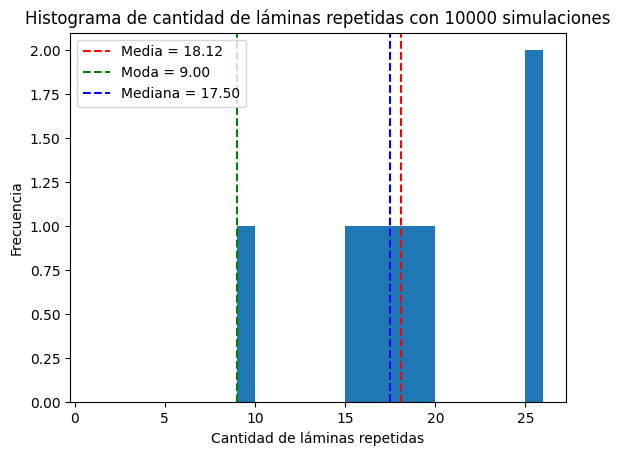

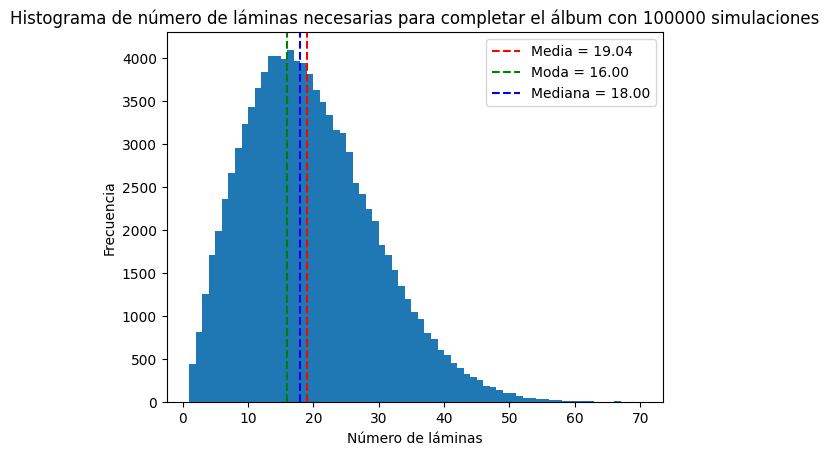

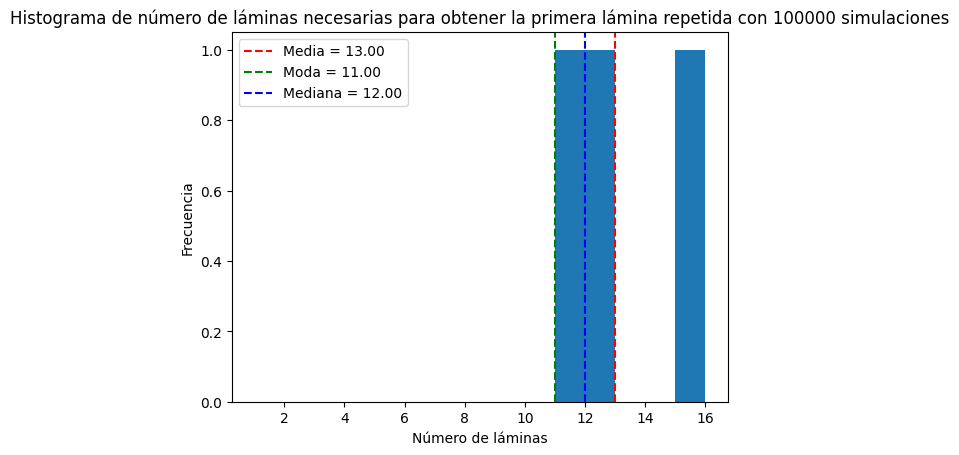

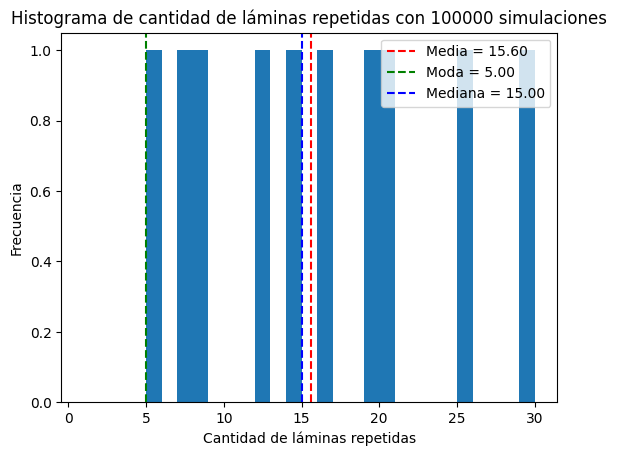

In [ ]:
n_simulaciones = [1, 10, 100, 1000, 10000, 100000]

for n in n_simulaciones:
    simulacion(n,df_new)

### LLamando a la función una por una

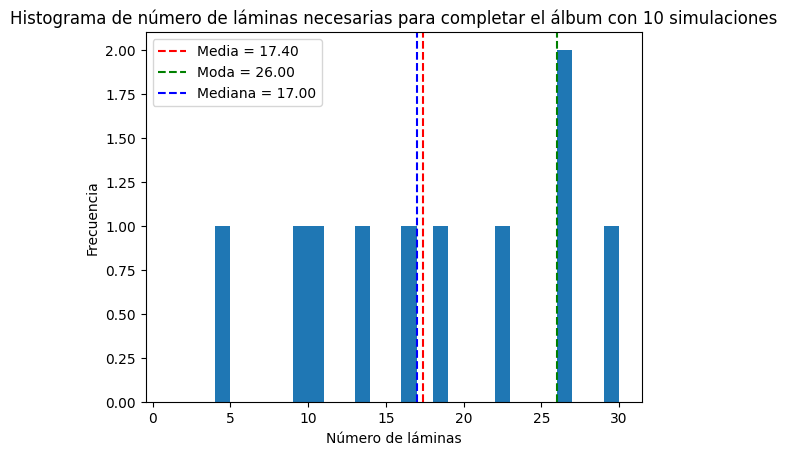

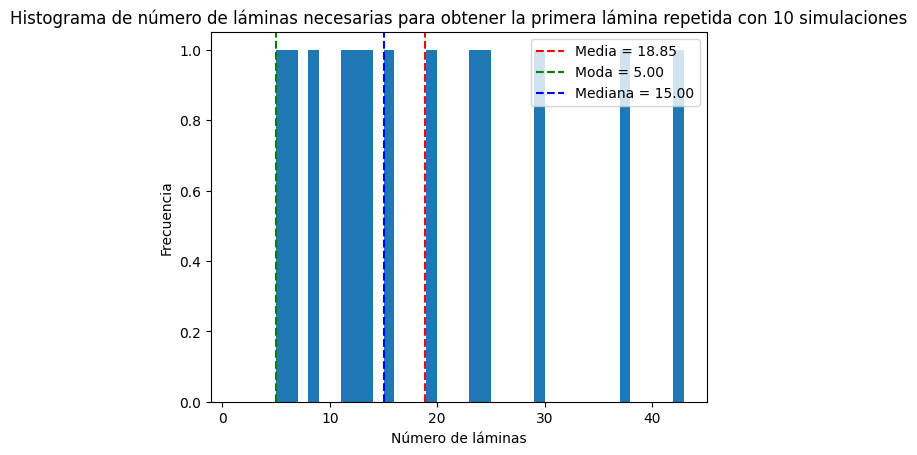

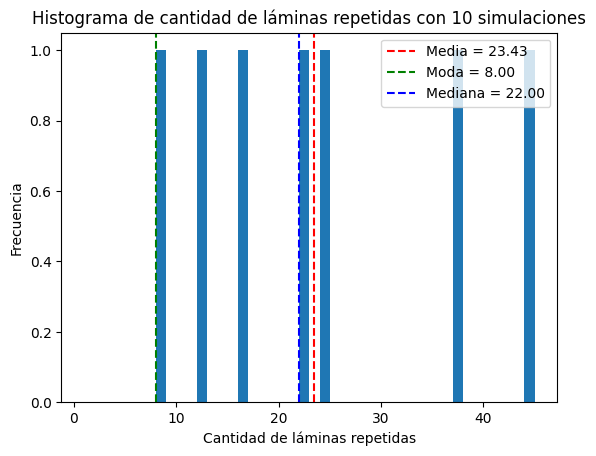

In [ ]:
simulacion(10,df_new)

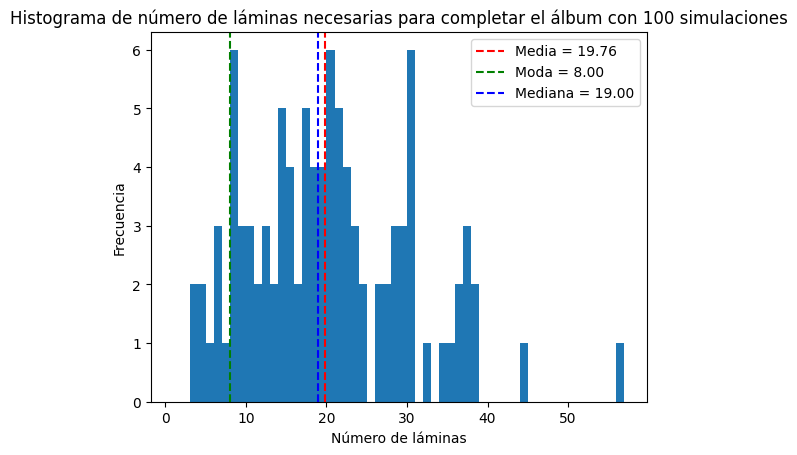

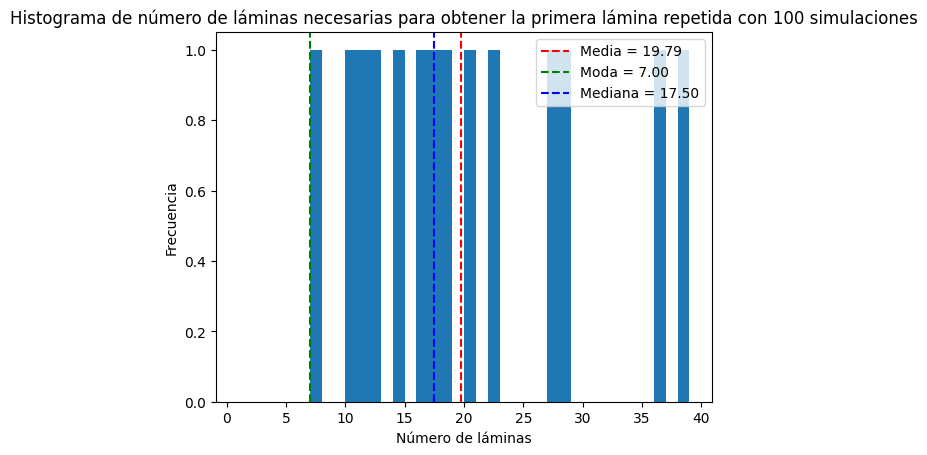

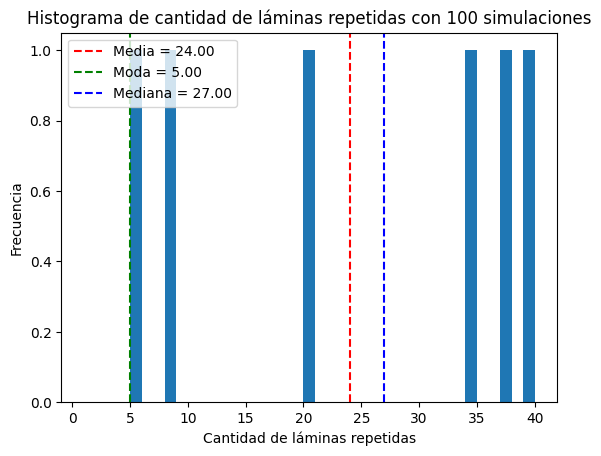

In [ ]:
simulacion(100,df_new)

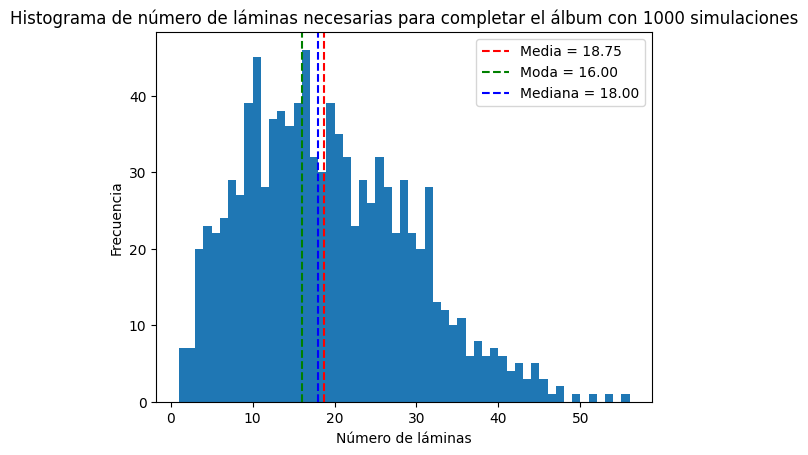

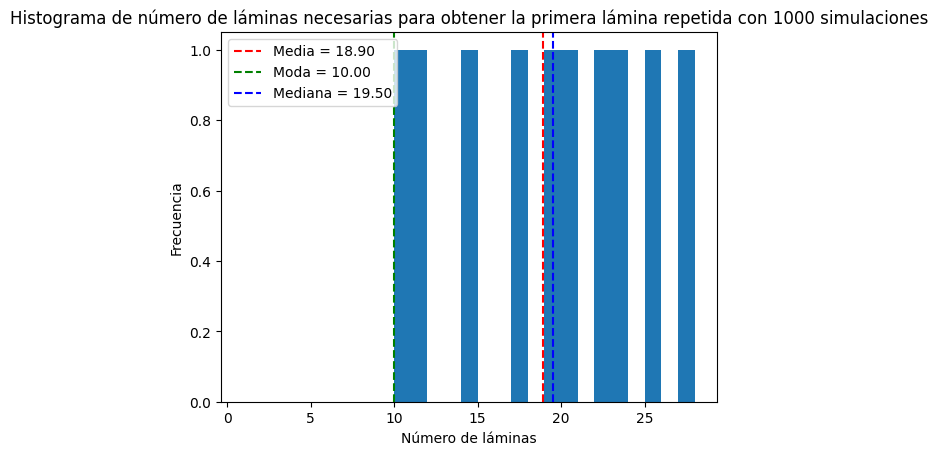

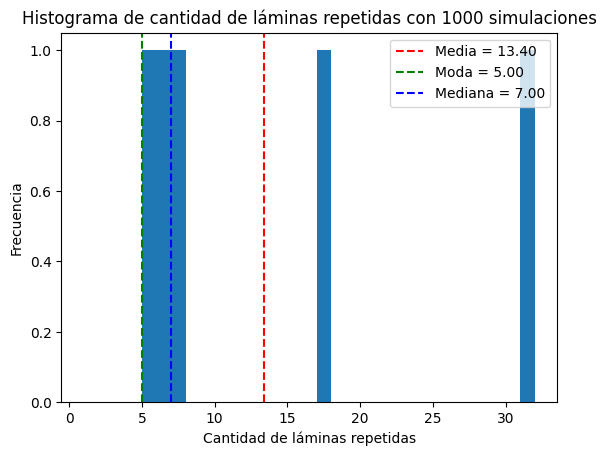

In [ ]:
simulacion(1000,df_new)

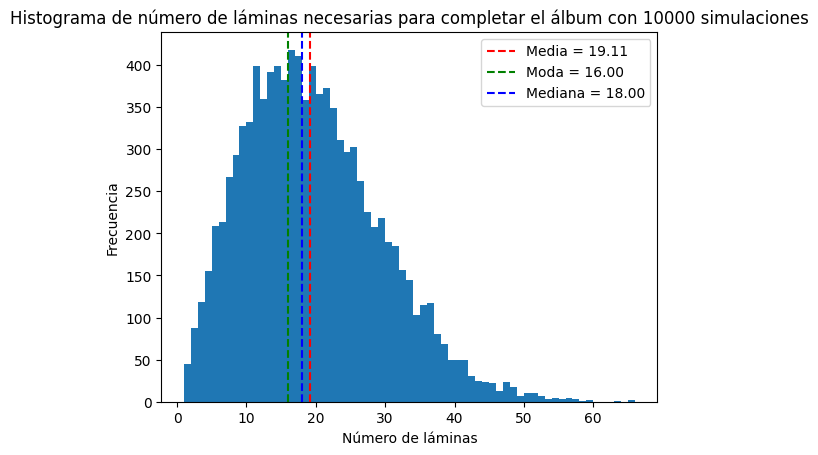

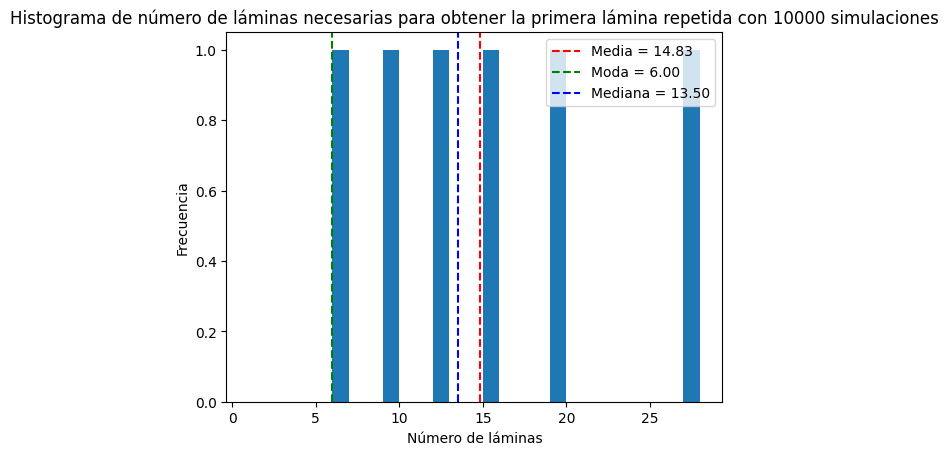

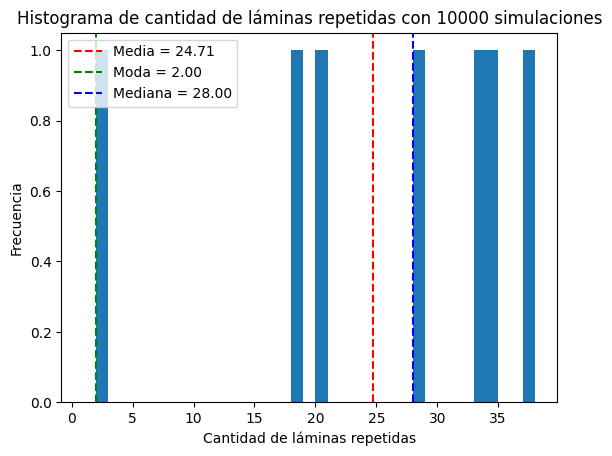

In [ ]:
simulacion(10000,df_new)

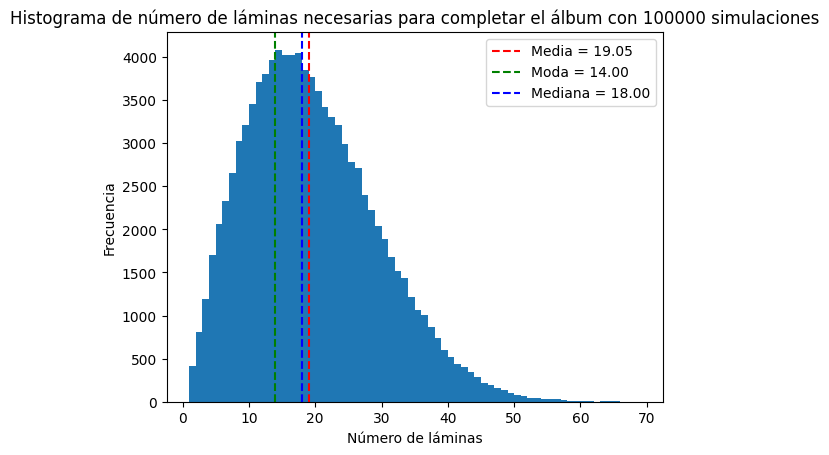

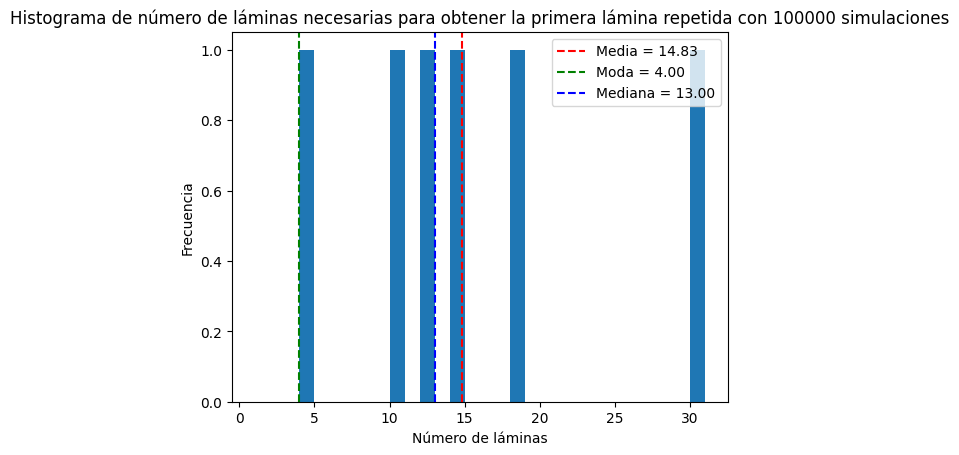

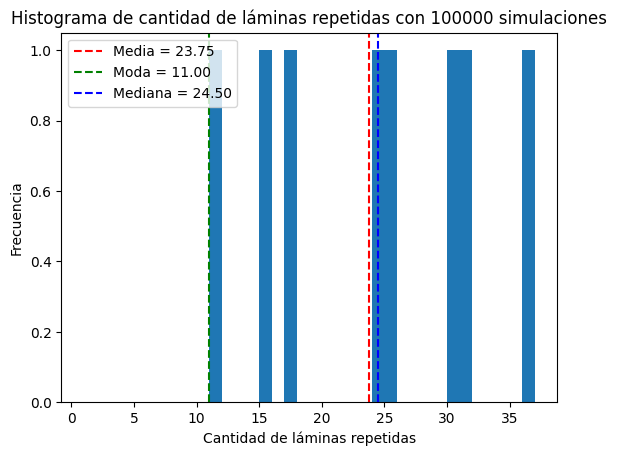

In [ ]:
simulacion(100000,df_new)

##Punto 2:

In [ ]:
# Esta función simula la compra de láminas del álbum y devuelve una lista con todas las láminas obtenidas
def comprar_laminas(df):
    laminas_obtenidas = []
    # Se compran 4000 láminas
    for _ in range(4000):
        # Se calcula la probabilidad normalizada de obtener cada lámina
        probs_norm =  df['Probabilidad'] / df['Probabilidad'].sum()
        # Se selecciona una lámina al azar con la probabilidad correspondiente a su probabilidad normalizada
        idx = np.random.choice(df.index, p=probs_norm)
        # Se guarda la información de la lámina (nombre y selección) en una nueva variable
        nueva_lamina = df.loc[idx, ['nombre', 'Seleccion']]
        # Se agrega la nueva lámina a la lista de láminas obtenidas
        laminas_obtenidas.append(nueva_lamina)
    # Se devuelve la lista completa de láminas obtenidas
    return laminas_obtenidas

# Se crea un diccionario para contar cuántas veces se obtuvo cada lámina
laminas_repetidas = {}

# Se realiza la simulación de la compra de láminas
for i in range(1):
    laminas_obtenidas = comprar_laminas(df)
    # Se guarda solo el nombre de cada lámina obtenida en una nueva lista
    laminas_obtenidas_1= [lamina['nombre'] for lamina in laminas_obtenidas]
    # Se guarda la selección de cada lámina obtenida en una nueva lista
    list_selecc= [lamina['Seleccion'] for lamina in laminas_obtenidas]
    # Se cuenta cuántas veces se obtuvo cada lámina y se agrega al diccionario correspondiente
    for lamina in laminas_obtenidas_1:
        if lamina in laminas_repetidas:
            laminas_repetidas[lamina] += 1
        else:
            laminas_repetidas[lamina] = 1

# Se crea un diccionario para contar cuántas láminas se obtuvieron de cada selección
seleccion_contador = {}
# Se cuenta cuántas láminas se obtuvieron de cada selección y se agrega al diccionario correspondiente
for lamina in laminas_obtenidas:
    seleccion = lamina['Seleccion']
    if seleccion in seleccion_contador:
        seleccion_contador[seleccion] += 1
    else:
        seleccion_contador[seleccion] = 1

# Se imprimen las 10 láminas más repetidas
print('\nTop 10 de laminas con mas repeticion')
top_10_laminas = sorted(laminas_repetidas.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_10 = pd.DataFrame(top_10_laminas, columns=["Nombre Lámina", "Frecuencia"])
print(df_top_10.head(10))

# Se imprimen las 10 láminas menos repetidas
print('\nTop 10 de menos laminas repetidas')
top_10_laminas = sorted(laminas_repetidas.items(), key=lambda x: x[1], reverse=False)[:10]
df_top_10_laminas = pd.DataFrame(top_10_laminas, columns=['nombre', 'repeticiones'])
print(df_top_10_laminas)
#[3]
total_repetidas = sum(count for count in laminas_repetidas.values() if count > 1)
print("\nTotal de laminas repetidas:", total_repetidas)
#[4]
laminas_solo_una_vez = 0
for lamina, count in laminas_repetidas.items():
    if count == 1:
        laminas_solo_una_vez += 1

print(f"Hubo {laminas_solo_una_vez} láminas que aparecieron solo una vez.")

#[5]
print('lista de selecciones:')
# Convertir la lista 'list_selecc' en un DataFrame
df_selecc = pd.DataFrame(list_selecc, columns=['nombre'])


# Eliminar los valores repetidos en el DataFrame
df_nombres = df_selecc.drop_duplicates().reset_index(drop=True)

print(df_nombres)

#[6]

print('\nLos nombres de las 5 selecciones de las que se obtuvieron menos láminas.')
selecciones_ordenadas = sorted(seleccion_contador.items(), key=lambda x: x[1])


df_selecciones_menos_laminas = pd.DataFrame(selecciones_ordenadas[:5], columns=['Seleccion', 'Num Laminas'])

# Resultado
print(df_selecciones_menos_laminas)
#[7]
print('\nSelecciones que obtuvieron mas laminas repetidas:')
top_5_selec_m = sorted(seleccion_contador.items(), key=lambda x: x[1], reverse=True)[:10]

df_top_5_laminas_m = pd.DataFrame(top_5_selec_m, columns=['nombre', 'repeticiones'])

print(df_top_5_laminas_m)

#[8]
print('\nseleccion con menos repetidas')
top_5_selec = sorted(seleccion_contador.items(), key=lambda x: x[1], reverse=False)[:10]

df_top_5_laminas = pd.DataFrame(top_5_selec, columns=['nombre', 'repeticiones'])

print(df_top_5_laminas)


#Primera y ultima[9]
selecciones = [lamina['Seleccion'] for lamina in laminas_obtenidas]
selecciones_unicas = set(selecciones)
selecciones_unicas = list(selecciones_unicas)
primeras_posiciones = [selecciones.index(seleccion) for seleccion in selecciones_unicas]
ultimas_posiciones = [len(selecciones) - 1 - selecciones[::-1].index(seleccion) for seleccion in selecciones_unicas]
posicion_primera_seleccion = min(primeras_posiciones)
posicion_ultima_seleccion = max(ultimas_posiciones)
primera_seleccion = selecciones[posicion_primera_seleccion]
ultima_seleccion = selecciones[posicion_ultima_seleccion]

print(f'primera seleccion: {primera_seleccion}')

print(f'Ultima seleccion:{ultima_seleccion}')



### Top 10 de laminas con mas repeticion

In [ ]:
# Se imprimen las 10 láminas más repetidas
print('Top 10 de laminas con mas repeticion')
top_10_laminas = sorted(laminas_repetidas.items(), key=lambda x: x[1], reverse=True)[:10]
df_top_10 = pd.DataFrame(top_10_laminas, columns=["Nombre Lámina", "Frecuencia"])
df_top_10.head(10)

Top 10 de laminas con mas repeticion


,Nombre Lámina,Frecuencia
0,Bailey Wright,37
1,Garang Kuol,34
2,Youstin Salas,32
3,Kendall Waston,31
4,Matthew Smith,31
5,Thomas Meunier,30
6,Thomas Muller,30
7,Kye Rowles,30
8,Kai Havertz,29
9,Mateusz Wieteska,29


### Top 10 de menos laminas repetidas

In [ ]:
# Se imprimen las 10 láminas menos repetidas
print('Top 10 de menos laminas repetidas')
top_10_laminas = sorted(laminas_repetidas.items(), key=lambda x: x[1], reverse=False)[:10]
df_top_10_laminas = pd.DataFrame(top_10_laminas, columns=['nombre', 'repeticiones'])
print(df_top_10_laminas)

Top 10 de menos laminas repetidas
              nombre  repeticiones
0   Brandon Aguilera             1
1      Neco Williams             1
2       Thilo Kehrer             1
3        Nouhou Tolo             1
4  Youssoufa Moukoko             1
5          Ao Tanaka             1
6  Eduardo Camavinga             1
7       Martin Boyle             1
8      Joel Campbell             1
9       Chris Mepham             1


### Total de laminas repetidas

In [ ]:
total_repetidas = sum(count for count in laminas_repetidas.values() if count > 1)
print("Total de laminas repetidas:", total_repetidas)

Total de laminas repetidas: 3981


### láminas que aparecieron solo una vez

In [ ]:
laminas_solo_una_vez = 0
for lamina, count in laminas_repetidas.items():
    if count == 1:
        laminas_solo_una_vez += 1

print(f"Hubo {laminas_solo_una_vez} láminas que aparecieron solo una vez.")

Hubo 19 láminas que aparecieron solo una vez.


###  Listado de selecciones de las que se obtuvieron todas las láminas

In [ ]:
print('lista de selecciones:')
# Convertir la lista 'list_selecc' en un DataFrame
df_selecc = pd.DataFrame(list_selecc, columns=['nombre'])


# Eliminar los valores repetidos en el DataFrame
df_nombres = df_selecc.drop_duplicates().reset_index(drop=True)

df_nombres

lista de selecciones:


,nombre
0,Costa Rica
1,Wales
2,Brazil
3,France
4,Japan
5,Belgium
6,Cameroon
7,USA
8,Germany
9,Australia


### Los nombres de las 5 selecciones de las que se obtuvieron menos láminas

In [ ]:
print('Los nombres de las 5 selecciones de las que se obtuvieron menos láminas.')
selecciones_ordenadas = sorted(seleccion_contador.items(), key=lambda x: x[1])
df_selecciones_menos_laminas = pd.DataFrame(selecciones_ordenadas[:5], columns=['Seleccion', 'Num Laminas'])

df_selecciones_menos_laminas

Los nombres de las 5 selecciones de las que se obtuvieron menos láminas.


,Seleccion,Num Laminas
0,France,264
1,Wales,270
2,Denmark,273
3,USA,301
4,Belgium,342


### Selecciones que obtuvieron mas laminas repetidas:

In [ ]:
print('Selecciones que obtuvieron mas laminas repetidas:')
top_5_selec_m = sorted(seleccion_contador.items(), key=lambda x: x[1], reverse=True)[:10]

df_top_5_laminas_m = pd.DataFrame(top_5_selec_m, columns=['nombre', 'repeticiones'])

df_top_5_laminas_m

Selecciones que obtuvieron mas laminas repetidas:


,nombre,repeticiones
0,Costa Rica,377
1,Australia,373
2,Japan,365
3,Germany,364
4,Poland,362
5,Cameroon,358
6,Brazil,351
7,Belgium,342
8,USA,301
9,Denmark,273


### Seleccion con menos repetidas

In [ ]:
print('seleccion con menos repetidas')
top_5_selec = sorted(seleccion_contador.items(), key=lambda x: x[1], reverse=False)[:10]

df_top_5_laminas = pd.DataFrame(top_5_selec, columns=['nombre', 'repeticiones'])

df_top_5_laminas.head(5)

seleccion con menos repetidas


,nombre,repeticiones
0,France,264
1,Wales,270
2,Denmark,273
3,USA,301
4,Belgium,342


### Primera y última selección en ser completada

In [ ]:
#Primera y ultima[9]
selecciones = [lamina['Seleccion'] for lamina in laminas_obtenidas]
selecciones_unicas = set(selecciones)
selecciones_unicas = list(selecciones_unicas)
primeras_posiciones = [selecciones.index(seleccion) for seleccion in selecciones_unicas]
ultimas_posiciones = [len(selecciones) - 1 - selecciones[::-1].index(seleccion) for seleccion in selecciones_unicas]
posicion_primera_seleccion = min(primeras_posiciones)
posicion_ultima_seleccion = max(ultimas_posiciones)
primera_seleccion = selecciones[posicion_primera_seleccion]
ultima_seleccion = selecciones[posicion_ultima_seleccion]

print(f'primera seleccion: {primera_seleccion}')

print(f'Ultima seleccion: {ultima_seleccion}')


primera seleccion: Costa Rica
Ultima seleccion: Germany


# Entrega 3

## Punto 1

### Tensor todo en uno

200
200
121 138


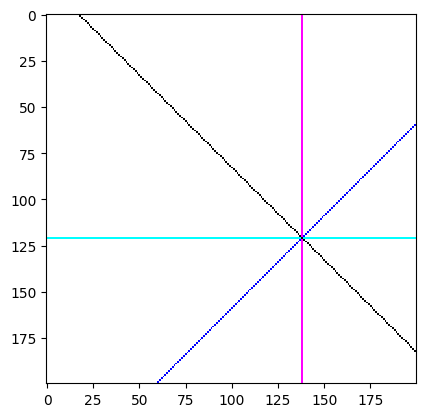

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fliplr(j):
  return nc-1-j
def flipud(i):
  return nf-1-i

# Create a tensor of ones
nf = int(input())
nc = int(input())
tensor = np.ones((nf, nc, 3))
# Dubla aleatoria
I, J = np.random.randint(0,nf-1),np.random.randint(0,nc-1) 
print(I,J)


tensor[I,:,0] = 0  # Fila
tensor[:,J,1] = 0  # Columna

for i in range(min(I, J) + 1):
    tensor[I - i, J - i, 2] = 0  # dp arriba

for i in range(min(nf - I, nc - J)):
    tensor[I+i, J+i, 2] = 0  # dp abajo

for i in range(min(nf - I, J + 1)):
    tensor[I+i, J-i, 0] = 0 # ds arriba

for i in range(min(I+1, nc-J)):
    tensor[I-i, J+i, 0] = 0  # ds abajo

for i in range(nf): #r14
  j = J + abs(i-I)
  if j < nc:
    tensor[i, j, 1] = 0

for i in range(nf): #r23
  j = J - abs(i-I)
  if j >=0:
    tensor[i, j, 1] = 0

for j in range(nc): #r12
  i = I - abs(j-J)
  if i >=0:
    tensor[i, j, 0] = 0

for j in range(nc): #r34
  i = I + abs(j-J)
  if i < nf:
    tensor[i, j, 0] = 0
# Plot the tensor
plt.imshow(tensor, interpolation='nearest')

### Tensor elemento por elemento

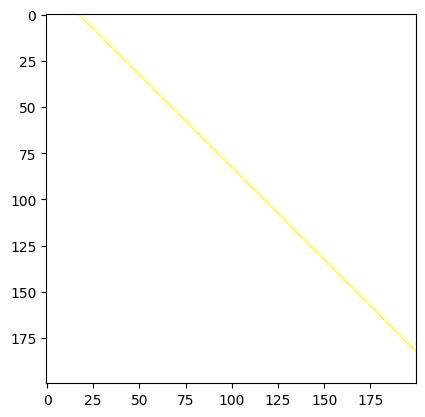

In [ ]:
def diagonal_principal(tensor, I, J, nf, nc):
  ntensor = np.ones((nf, nc, 3))
  for i in range(min(I, J) + 1):
      ntensor[I - i, J - i, 2] = 0  # dp arriba
  for i in range(min(nf - I, nc - J)):
      ntensor[I + i, J + i, 2] = 0  # dp abajo
  plt.imshow(ntensor)

diagonal_principal(tensor,I,J, nf,nc)

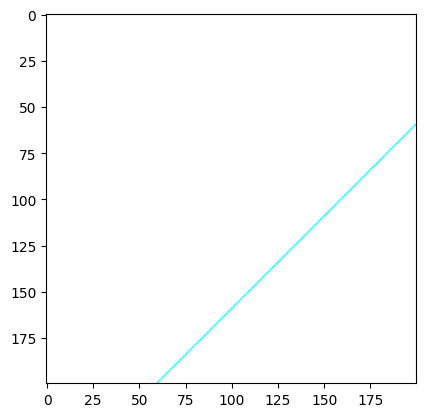

In [ ]:
def diagonal_secundaria(tensor, I, J, nf, nc):
  ntensor = np.ones((nf, nc, 3))
  for i in range(min(nf - I, J + 1)):
      ntensor[I+i, J-i, 0] = 0  # ds arriba

  for i in range(min(I+1, nc-J)):
      ntensor[I-i, J+i, 0] = 0  # ds abajo

  plt.imshow(ntensor)

diagonal_secundaria(tensor,I,J, nf,nc)    

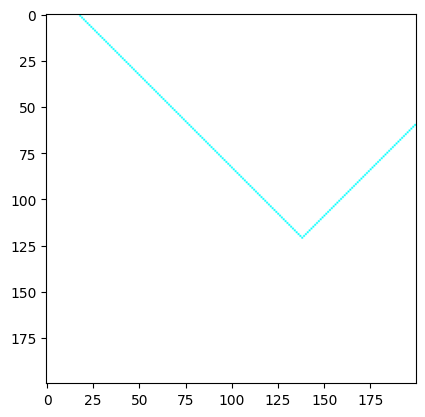

In [ ]:
def rama12(tensor, I, J, nf, nc):
  ntensor = np.ones((nf, nc, 3))
  for j in range(nc): #r12
    i = I - abs(j-J)
    if i >=0:
      ntensor[i, j, 0] = 0
  plt.imshow(ntensor)
rama12(tensor,I,J, nf,nc)


In [ ]:
def rama23(tensor, I, J, nf, nc):
  ntensor = np.ones((nf, nc, 3))
  for i in range(nf): #r23
    j = J - abs(i-I)
    if j >=0:
      ntensor[i, j, 1] = 0
  plt.imshow(ntensor)
rama23(tensor, I, J, nf, nc)

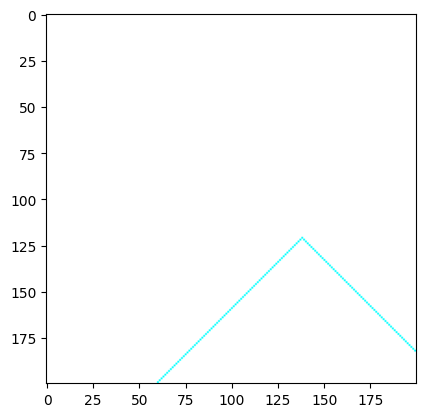

In [ ]:
def rama34(tensor, I, J, nf, nc):
  ntensor = np.ones((nf, nc, 3))
  for j in range(nc): #r34
    i = I + abs(j-J)
    if i < nf:
      ntensor[i, j, 0] = 0
  plt.imshow(ntensor)

rama34(tensor, I, J, nf, nc)

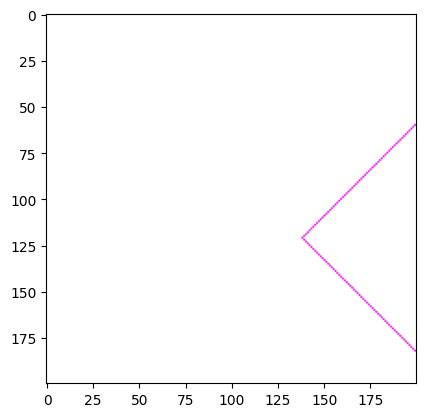

In [ ]:
def rama14(tensor, I, J, nf, nc):
  ntensor = np.ones((nf, nc, 3))
  for i in range(nf): #r14
    j = J + abs(i-I)
    if j < nc:
      ntensor[i, j, 1] = 0

  plt.imshow(ntensor)
rama14(tensor, I, J, nf, nc)

### Imagen del pto 1

(1209, 1287, 3)
295 775


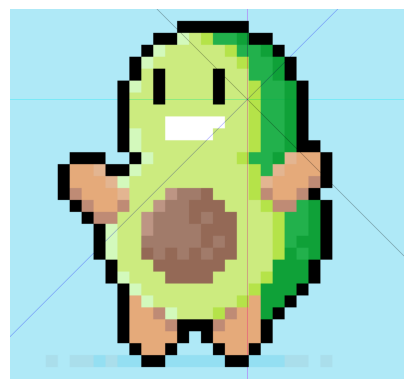

In [ ]:
# Cargar la imagen y convertirla en un tensor
image = plt.imread('/content/Aguacate.png')
tensor = np.array(image)
tensor = tensor[:, :, :3]

print(tensor.shape)
nf, nc = tensor.shape[0], tensor.shape[1]

I, J = np.random.randint(0,nf-1),np.random.randint(0,nc-1) 
print(I,J)

tensor[I,:,0] = 0  # Fila
tensor[:,J,1] = 0  # Columna

for i in range(min(I, J) + 1):
    tensor[I - i, J - i, 2] = 0  # dp arriba

for i in range(min(nf - I, nc - J)):
    tensor[I+i, J+i, 2] = 0  # dp abajo

for i in range(min(nf - I, J + 1)):
    tensor[I+i, J-i, 0] = 0 # ds arriba

for i in range(min(I+1, nc-J)):
    tensor[I-i, J+i, 0] = 0  # ds abajo

for i in range(nf): #r14
  j = J + abs(i-I)
  if j < nc:
    tensor[i, j, 1] = 0

for i in range(nf): #r23
  j = J - abs(i-I)
  if j >=0:
    tensor[i, j, 1] = 0

for j in range(nc): #r12
  i = I - abs(j-J)
  if i >=0:
    tensor[i, j, 0] = 0

for j in range(nc): #r34
  i = I + abs(j-J)
  if i < nf:
    tensor[i, j, 0] = 0

plt.imshow(tensor)
plt.axis('off')
plt.show()


## Punto 2

In [89]:
def rectangulo(i,j,subtensor, tensor, color = [255, 0, 0]):
  subtensor[i, j] = color

  if (i==f-1 and j==c-1):
    start_row = (nf - f) // 2
    start_col = (nc - c) // 2
    tensor[start_row:start_row+f, start_col:start_col+c, :] = subtensor
    plt.imshow(tensor)
    plt.axis('off') 
  elif i==f-1:
    rectangulo(0,j+1,subtensor, tensor, [0, 255, 0] )
  else:
    rectangulo(i+1,j,subtensor, tensor, [0, 0, 255] )

In [90]:
def triangulo_isoceles(i,j,subtensor, tensor, color = [255, 0, 0] ):
  subtensor[i, j] = color
  if (i==f-1 and j==c-1):
    start_row = (nf - f) // 2
    start_col = (nc - c) // 2
    tensor[start_row:start_row+f, start_col:start_col+c, :] = subtensor
    plt.imshow(tensor)
    plt.axis('off')   
  elif (i==f-1):    
    triangulo_isoceles(abs((j+1)-(f-1)),j+1,subtensor, tensor, [0, 255, 0] )
  else:  
    triangulo_isoceles(i+1,j,subtensor, tensor, [0, 0, 255] )

In [91]:
def triangulo_rectangulo(i,j,subtensor, tensor, color = [255, 0, 0] ):
  subtensor[i, j] = color 
  if (i==n-1 and j==n-1): #CASO BASE
    start_row = (nf - f) // 2
    start_col = (nc - c) // 2
    tensor[start_row:start_row+n, start_col:start_col+n, :] = subtensor
    plt.imshow(tensor)
    plt.axis('off')
  elif i==n-1:#SINGULARIDADES
    triangulo_rectangulo(j+1,j+1,subtensor, tensor, [0, 255, 0] )
  else:
    triangulo_rectangulo(i+1, j, subtensor, tensor, [0, 0, 255] )

In [92]:
def rombo(i,j,subtensor, tensor, color = [255, 0, 0] ):
  subtensor[i, j] = color

  if (i==n-1 and j==v):
    start_row = (nf - n) // 2
    start_col = (nc - n) // 2
    tensor[start_row:start_row+n, start_col:start_col+n, :] = subtensor
    plt.imshow(tensor)
    plt.axis('off')
  elif (j==(n-1)-abs(v-i)):
    rombo(i+1,abs(v-(i+1)),subtensor, tensor, [0, 255, 0] )
  else:
    rombo(i,j+1,subtensor, tensor, [0, 0, 255] )

In [93]:
# Calcular los índices de inicio para el subtensor
def inicio_tensor(nf, nc, f, c):
  start_row = (nf - f) // 2
  start_col = (nc - c) // 2
  subtensor = tensor[start_row:start_row+f, start_col:start_col+c, :]
  return subtensor

In [94]:
def svg(image):
  # Lee el archivo SVG
  svg_file = image
  svg_data = open(svg_file, 'rb').read()

  # Convierte el SVG en una imagen rasterizada (PNG)
  png_data = cairosvg.svg2png(bytestring=svg_data)

  # Convierte la imagen PNG en un tensor
  return plt.imread(png_data)

1. Rectangulo
2. Triandulo Isoceles
3. Triangulo Rectangulo
4. Rombo
5.salir
Que le quieres aplicar a la imagen?: 1
(32, 32, 3)


Ingrese el número de columnas para la figura: 15
Ingrese el número de filas para la figura: 10


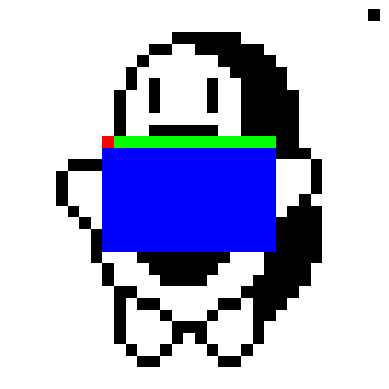

In [98]:
print("1. Rectangulo")
print("2. Triandulo Isoceles")
print("3. Triangulo Rectangulo")
print("4. Rombo")
print("5.salir")

res = int(input("Que le quieres aplicar a la imagen?: "))
while (res <1 or res > 5):
  res = int(input("Error, intenta nuevamente: "))

#PNG
# URL de la imagen en Google Drive
url = 'https://raw.githubusercontent.com/Slrosales/PC_AGUACATE_202310/main/aguacate.png'

# Obtener la imagen directamente desde la URL
image = Image.open(requests.get(url, stream=True).raw)

tensor = np.array(image)
tensor = tensor[:, :, :3]
print(tensor.shape)
nf, nc = tensor.shape[0], tensor.shape[1]

print("\n")
if res == 1:
  c = int(input('Ingrese el número de columnas para la figura: '))
  f = int(input('Ingrese el número de filas para la figura: '))
  while c > nc or f > nf:
    print('El número de columnas o filas excede el máximo permitido')
    c = int(input('Ingrese el número de columnas para la figura: '))
    f = int(input('Ingrese el número de filas para la figura: '))
  subtensor = inicio_tensor(nf, nc, f, c)
  rectangulo(0, 0, subtensor, tensor)
  
elif(res == 2):
  # Solicitar al usuario el número de columnas para la figura
  f = int(input('Ingrese el número de filas para la figura: '))
  # Verificar si el número de columnas excede el máximo
  while 2*f-1 > nc or f > nf:
      print('El número de filas o columas excede el máximo permitido.')
      f = int(input('Ingrese el número de filas para la figura: '))
  c=2*f-1
  subtensor = inicio_tensor(nf, nc, f, c)
  triangulo_isoceles(f-1,0, subtensor, tensor)

elif(res == 3):
  # Solicitar al usuario el número de columnas para la figura
  n = int(input('Ingrese el número de la matriz nxn para la figura: '))

  # Verificar si el número de columnas excede el máximo
  while n > nc or n > nf:
      print('El número de columnas o filas excede el máximo permitido.')
      n = int(input('Ingrese el número de la matriz nxn para la figura: '))
  subtensor = inicio_tensor(nf, nc, n, n)
  triangulo_rectangulo(0,0,subtensor, tensor)

elif(res == 4):
  # Solicitar al usuario el número de columnas para la figura
  n = int(input('Ingrese el número de impar columnas para la figura: '))

  while n > nc or n > nf:
    print('El número de columnas excede el máximo permitido.')
    n = int(input('Ingrese el número impar de la matriz nxn para la figura: '))

  if (n%2==0): n=n+1
  v = (n-1)//2
  subtensor = inicio_tensor(nf, nc, n, n)
  rombo(0, v, subtensor, tensor)
else:
  exit()

1. Rectangulo
2. Triandulo Isoceles
3. Triangulo Rectangulo
4. Rombo
5.salir
Que le quieres aplicar a la imagen?: 1
(32, 32, 3)


Ingrese el número de columnas para la figura: 10
Ingrese el número de filas para la figura: 15


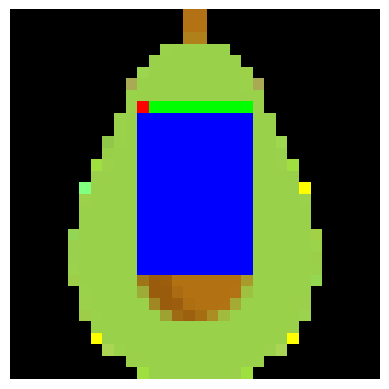

In [100]:
print("1. Rectangulo")
print("2. Triandulo Isoceles")
print("3. Triangulo Rectangulo")
print("4. Rombo")
print("5.salir")

res = int(input("Que le quieres aplicar a la imagen?: "))
while (res <1 or res > 5):
  res = int(input("Error, intenta nuevamente: "))

#svg
# URL de la imagen en Google Drive
url = 'https://raw.githubusercontent.com/Slrosales/PC_AGUACATE_202310/126c303d636915ffcb3dbaa90425330df871ad1a/Aguacate.svg'

# Obtener la imagen directamente desde la URL
image = cairosvg.svg2png(url=url)
image = io.BytesIO(image)
image = Image.open(image)

# Convertir la imagen en un tensor
tensor = np.array(image)
tensor = tensor[:, :, :3]
print(tensor.shape)
nf, nc = tensor.shape[0], tensor.shape[1]

print("\n")
if res == 1:
  c = int(input('Ingrese el número de columnas para la figura: '))
  f = int(input('Ingrese el número de filas para la figura: '))
  while c > nc or f > nf:
    print('El número de columnas o filas excede el máximo permitido')
    c = int(input('Ingrese el número de columnas para la figura: '))
    f = int(input('Ingrese el número de filas para la figura: '))
  subtensor = inicio_tensor(nf, nc, f, c)
  rectangulo(0, 0, subtensor, tensor)
  

elif(res == 2):
  # Solicitar al usuario el número de columnas para la figura
  f = int(input('Ingrese el número de filas para la figura: '))
  # Verificar si el número de columnas excede el máximo
  while 2*f-1 > nc or f > nf:
      print('El número de filas o columas excede el máximo permitido.')
      f = int(input('Ingrese el número de filas para la figura: '))
  c=2*f-1
  subtensor = inicio_tensor(nf, nc, f, c)
  triangulo_isoceles(f-1,0, subtensor, tensor)

elif(res == 3):
  # Solicitar al usuario el número de columnas para la figura
  n = int(input('Ingrese el número de la matriz nxn para la figura: '))

  # Verificar si el número de columnas excede el máximo
  while n > nc or n > nf:
      print('El número de columnas o filas excede el máximo permitido.')
      n = int(input('Ingrese el número de la matriz nxn para la figura: '))
  subtensor = inicio_tensor(nf, nc, n, n)
  triangulo_rectangulo(0,0,subtensor, tensor)

elif(res == 4):
  # Solicitar al usuario el número de columnas para la figura
  n = int(input('Ingrese el número de impar columnas para la figura: '))

  while n > nc or n > nf:
    print('El número de columnas excede el máximo permitido.')
    n = int(input('Ingrese el número impar de la matriz nxn para la figura: '))

  if (n%2==0): n=n+1
  v = (n-1)//2
  subtensor = inicio_tensor(nf, nc, n, n)
  rombo(0, v, subtensor, tensor)
else:
  exit()

1. Rectangulo
2. Triandulo Isoceles
3. Triangulo Rectangulo
4. Rombo
5.salir
Que le quieres aplicar a la imagen?: 1
(32, 32, 3)


Ingrese el número de columnas para la figura: 10
Ingrese el número de filas para la figura: 15


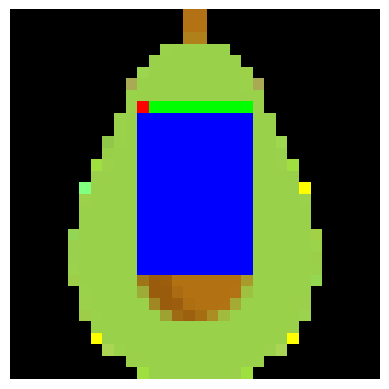

In [104]:
print("1. Rectangulo")
print("2. Triandulo Isoceles")
print("3. Triangulo Rectangulo")
print("4. Rombo")
print("5.salir")

res = int(input("Que le quieres aplicar a la imagen?: "))
while (res <1 or res > 5):
  res = int(input("Error, intenta nuevamente: "))

eps_url = 'https://github.com/Slrosales/PC_AGUACATE_202310/blob/main/avocado.eps'
output_format = 'png'  # Formato de salida, por ejemplo, 'png' o 'jpeg'

# Ejecutar el comando de conversión utilizando Ghostscript
command = f'gs -dSAFER -dBATCH -dNOPAUSE -sDEVICE={output_format} -sOutputFile=- -q {eps_url}'
process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)

# Leer la salida del proceso y crear la imagen PIL
image_bytes = process.stdout.read()
bytesx = io.BytesIO()
image.save(bytesx, format='PNG')
image.seek(0)
image = Image.open(bytesx)

# Convertir la imagen en un tensor
tensor = np.array(image)
tensor = tensor[:, :, :3]
print(tensor.shape)
nf, nc = tensor.shape[0], tensor.shape[1]

print("\n")
if res == 1:
  c = int(input('Ingrese el número de columnas para la figura: '))
  f = int(input('Ingrese el número de filas para la figura: '))
  while c > nc or f > nf:
    print('El número de columnas o filas excede el máximo permitido')
    c = int(input('Ingrese el número de columnas para la figura: '))
    f = int(input('Ingrese el número de filas para la figura: '))
  subtensor = inicio_tensor(nf, nc, f, c)
  rectangulo(0, 0, subtensor, tensor)
  

elif(res == 2):
  # Solicitar al usuario el número de columnas para la figura
  f = int(input('Ingrese el número de filas para la figura: '))
  # Verificar si el número de columnas excede el máximo
  while 2*f-1 > nc or f > nf:
      print('El número de filas o columas excede el máximo permitido.')
      f = int(input('Ingrese el número de filas para la figura: '))
  c=2*f-1
  subtensor = inicio_tensor(nf, nc, f, c)
  triangulo_isoceles(f-1,0, subtensor, tensor)

elif(res == 3):
  # Solicitar al usuario el número de columnas para la figura
  n = int(input('Ingrese el número de la matriz nxn para la figura: '))

  # Verificar si el número de columnas excede el máximo
  while n > nc or n > nf:
      print('El número de columnas o filas excede el máximo permitido.')
      n = int(input('Ingrese el número de la matriz nxn para la figura: '))
  subtensor = inicio_tensor(nf, nc, n, n)
  triangulo_rectangulo(0,0,subtensor, tensor)

elif(res == 4):
  # Solicitar al usuario el número de columnas para la figura
  n = int(input('Ingrese el número de impar columnas para la figura: '))

  while n > nc or n > nf:
    print('El número de columnas excede el máximo permitido.')
    n = int(input('Ingrese el número impar de la matriz nxn para la figura: '))

  if (n%2==0): n=n+1
  v = (n-1)//2
  subtensor = inicio_tensor(nf, nc, n, n)
  rombo(0, v, subtensor, tensor)
else:
  exit()